<a href="https://colab.research.google.com/github/PGLWGES/LLM/blob/main/LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1 requeiment

In [3]:
!pip install uv

In [4]:
!uv pip install -r https://raw.githubusercontent.com/rasbt/LLMs-from-scratch/refs/heads/main/requirements.txt --system

Using Python 3.11.13 environment at: /usr
Audited 9 packages in 449ms


# 2 Working with text data

## 2.1 Understanding word embeddings

## 2.2 Tokenizing text

In [5]:
# urllib.request 打开URL（主要是HTTP）
import urllib.request
url = ("https://raw.githubusercontent.com/rasbt/"
     "LLMs-from-scratch/main/ch02/01_main-chapter-code/"
     "the-verdict.txt")
file_path = "the-verdict.txt"
# 从指定的URL下载数据
urllib.request.urlretrieve(url, file_path)

('the-verdict.txt', <http.client.HTTPMessage at 0x7835b105df10>)

In [6]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
  raw_text = f.read()
print("Total number of character:", len(raw_text))
print(raw_text[:99])

Total number of character: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [7]:
# 导入正则表达式模块
import re
text = "Hello, world. This, is a test."
result = re.split(r'(\s)', text)
print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


In [8]:
result = re.split(r'([,.]|\s)', text)
print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


In [9]:
# 移除空字符串
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']


In [10]:
text = "Hello, world. Is this-- a test?"
result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
# 对每个item调用strip() 移除首尾两端的空白字符
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [11]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(len(preprocessed))

4690


In [12]:
print(preprocessed[:30])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


## 2.3 Converting tokens into token IDs

In [13]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)
print(vocab_size)

1130


In [14]:
# vocab = {}
# for integer, token in enumerate(all_words):
#     vocab[token] = integer  # 键为token，值为integer
vocab = {token:integer for integer,token in enumerate(all_words)}
for i, item in enumerate(vocab.items()):
  print(item)
  if i >= 50:
    break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


In [15]:
# 定义一个简单的文本分词器类，用于编码（文本转ID）和解码（ID转文本）
class SimpleTokenizerV1:
    # 初始化方法，接收词汇表（vocab）作为参数
    def __init__(self, vocab):
        # 存储 字符串（token）到整数（ID）的映射
        # 字典结构 {键：值} self.str_to_int[key] = value
        self.str_to_int = vocab
        # 构建 整数（ID）到字符串（token）的反向映射，用于解码
        # 反向映射 {值：键}
        self.int_to_str = {i: s for s, i in vocab.items()}

    # 编码方法：将输入文本转换为 token ID 列表
    def encode(self, text):
        # 步骤1：用正则表达式分割文本，拆分出 token（包含标点、单词等）
        # 正则匹配逻辑
        preprocessed = re.split(r'([,.?!\'"\[\]]|--|\s)', text)
        # 步骤2：过滤空内容（strip后为空的项），并去除每个 token 首尾空白
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        # 步骤3：通过词汇表映射，将每个字符串 token 转为对应的整数 ID
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids  # 返回编码后的 ID 列表

    # 解码方法：将 token ID 列表转换为原始文本
    def decode(self, ids):
        # 步骤1：通过反向映射，将 ID 转回字符串 token，并用空字符串拼接
        text = " ".join([self.int_to_str[i] for i in ids])
        # 步骤2：用正则表达式清理标点前的多余空格
        # 匹配逻辑：标点（,.?!'"\[]）前的一个或多个空格，替换为单个空格（保证标点前无冗余空格）
        text = re.sub(r'\s+([,.?!\'"\[\]])', r'\1', text)
        return text  # 返回解码后的文本

In [16]:
tokenizer = SimpleTokenizerV1(vocab)
text = """"It's the last he painted, you know,"
        Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [17]:
print(tokenizer.decode(ids))

" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


In [18]:
# text = "Hello, do you like tea?"
# print(tokenizer.encode(text))

## 2.4 Adding special context tokens

In [19]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
vocab = {token:integer for integer,token in enumerate(all_tokens)}
print(len(vocab.items()))

1132


In [20]:
for i, item in enumerate(list(vocab.items())[-5:]):
  print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [21]:
# 定义一个增强版的简单文本分词器类（相比V1版本增加了OOV处理）
class SimpleTokenizerV2:
    def __init__(self, vocab):
        # 存储 字符串→ID 的映射（来自传入的词汇表）
        self.str_to_int = vocab
        # 构建 反向映射（ID→字符串），用于解码
        self.int_to_str = {i: s for s, i in vocab.items()}

    def encode(self, text):
        # 步骤1：使用正则表达式将文本拆分为tokens（包括标点和空格）
        preprocessed = re.split(r'([,.?!\'"\[\]]|--|\s)', text)

        # 步骤2：过滤空字符串，并去除每个token的首尾空格
        preprocessed = [item.strip() for item in preprocessed if item.strip()]

        # 步骤3：处理未登录词（OOV）：将词汇表中不存在的token替换为<|unk|>
        # 关键增强点：相比V1版本，增加了对未知词的处理，避免KeyError
        preprocessed = [
            # 如果token在词汇表中，保留原样
            item if item in self.str_to_int
            # 否则替换为特殊的未知词标记
            else "<|unk|>"
            for item in preprocessed
        ]

        # 步骤4：将tokens转换为对应的ID
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        # 步骤1：将ID列表转换回字符串tokens，并使用空格拼接（可能产生多余空格）
        # 注意：此处使用空格拼接是为了后续正则处理的便利性
        text = " ".join([self.int_to_str[i] for i in ids])

        # 步骤2：修复标点符号前的多余空格（与V1版本相同）
        # 例如：将 "Hello , world" 转换为 "Hello, world"
        text = re.sub(r'\s+([,.?!\'"\[\]])', r'\1', text)
        return text

In [22]:
text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."
text = " <|endoftext|> ".join((text1, text2))
print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [23]:
tokenizer = SimpleTokenizerV2(vocab)
print(tokenizer.encode(text))

[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]


In [24]:
print(tokenizer.decode(tokenizer.encode(text)))

<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.


## 2.5 Btye pair encoding

In [25]:
pip install tiktoken

In [26]:
# importlib.metadata 访问已安装 Python 包的元数据
from importlib.metadata import version
# 计算 token 数量的库
import tiktoken
print("tiktoken version:", version("tiktoken"))

tiktoken version: 0.9.0


In [27]:
# 使用gpt-2的分词逻辑
tokenizer = tiktoken.get_encoding("gpt2")

In [28]:
text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
    "of someunknownPlace."
)
integers = tokenizer.encode(text, allowed_special = {"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]


In [29]:
strings = tokenizer.decode(integers)
print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


In [30]:
ip = "Akwirw ier"
temp = tokenizer.encode(ip)
print(temp)
op = tokenizer.decode(temp)
print(op)

[33901, 86, 343, 86, 220, 959]
Akwirw ier


## 2.6 Data sampling with a silding window

In [31]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()
enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [32]:
enc_sample = enc_text[50:]

In [33]:
# 定义上下文窗口大小，即每次取多少个连续的 token 作为输入上下文
context_size = 4
# 从编码后的样本中，取从开头到 context_size 位置的子序列作为输入特征 x
# 比如 context_size=4 时，取 [0,1,2,3] 位置的 token
x = enc_sample[:context_size]
# 从编码后的样本中，取从第 1 个位置到 context_size+1 位置的子序列作为目标值 y
# 相当于在 x 的基础上向后滑动一位，用于训练时让模型学习“根据 x 预测下一个 token（即 y 对应的序列）”
y = enc_sample[1:context_size+1]
# 打印输入特征 x 的内容，方便调试或查看数据
print(f"x: {x}")
# 打印目标值 y 的内容，观察模型需要预测的结果形式
print(f"y:    {y}")

x: [290, 4920, 2241, 287]
y:    [4920, 2241, 287, 257]


In [34]:
# 遍历从 1 到 context_size（包含 context_size）的整数，实现滑动窗口的效果
for i in range(1, context_size + 1):
    # 截取从序列起始到索引 i 的子序列，作为模型的输入上下文
    # 随着 i 增大，上下文长度从 1 逐渐增加到 context_size
    context = enc_sample[:i]
    # 选取索引 i 位置的元素，作为模型需要预测的目标
    desired = enc_sample[i]
    # 打印当前的输入上下文和对应的预测目标，方便观察滑动窗口过程
    print(context, "----->", desired)

[290] -----> 4920
[290, 4920] -----> 2241
[290, 4920, 2241] -----> 287
[290, 4920, 2241, 287] -----> 257


In [35]:
for i in range(1, context_size+1):
  context = enc_sample[:i]
  desired = enc_sample[i]
  print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


In [36]:
pip install torch

In [37]:
# Dataset：一个抽象基类，用于定义自定义数据集
# DataLoader：用于将 Dataset 包装成一个可迭代的数据加载器，方便在训练时高效地获取数据批次
import torch
from torch.utils.data import Dataset, DataLoader

# 定义一个名为 GPTDatasetV1 的数据集类，继承自 PyTorch 的 Dataset 类
class GPTDatasetV1(Dataset):
    # 初始化方法，用于创建数据集对象时设置参数和初始化数据
    # txt: 原始文本数据
    # tokenizer: 分词器，用于将文本转换为 token IDs
    # max_length: 每个输入块（input chunk）的最大长度
    # stride: 滑动窗口的步长，控制每次窗口移动的距离
    def __init__(self, txt, tokenizer, max_length, stride):
        # 初始化存储输入 token IDs 的列表
        self.input_ids = []
        # 初始化存储目标 token IDs 的列表
        self.target_ids = []

        # 使用分词器对整个文本进行编码，得到 token IDs 序列
        # tokenizer.encode 方法会同时完成分词和转换为 token IDs 的操作
        token_ids = tokenizer.encode(txt)  # Tokenizes the entire text（对整个文本进行分词）

        # 滑动窗口遍历 token_ids 序列，生成输入块和目标块
        # 遍历的起始位置从 0 开始，结束位置为 len(token_ids) - max_length（保证窗口不越界），步长为 stride
        for i in range(0, len(token_ids) - max_length, stride):
            # 截取从 i 开始，长度为 max_length 的子序列作为输入块
            input_chunk = token_ids[i:i + max_length]
            # 截取从 i + 1 开始，长度为 max_length 的子序列作为目标块（输入块右移一位，用于预测下一个词）
            target_chunk = token_ids[i + 1:i + max_length + 1]

            # 将输入块转换为 PyTorch 张量，并添加到 input_ids 列表中
            self.input_ids.append(torch.tensor(input_chunk))
            # 将目标块转换为 PyTorch 张量，并添加到 target_ids 列表中
            self.target_ids.append(torch.tensor(target_chunk))

    # 用于返回数据集的样本数量，PyTorch 的 Dataset 类需要实现的方法
    def __len__(self):
        # 返回输入数据的数量，即 input_ids 列表的长度
        return len(self.input_ids)  # Returns the total number of rows in the dataset（返回数据集中行的总数）

    # 用于根据索引 idx 获取数据集中的一个样本（输入和对应的目标），PyTorch 的 Dataset 类需要实现的方法
    def __getitem__(self, idx):
        # 返回指定索引 idx 对应的输入张量和目标张量
        return self.input_ids[idx], self.target_ids[idx]  # Returns a single row from the dataset（从数据集中返回一行数据）

In [38]:
import tiktoken
def create_dataloader_v1(txt,
             batch_size=4,
             max_length=256,
             stride=128,
             shuffle=True,
             drop_last=True,
             num_workers=0):
    # 初始化分词器，使用 tiktoken 库的 get_encoding 方法获取 "gpt2" 对应的编码方式
    # 分词器用于将文本转换为模型可处理的 token
    tokenizer = tiktoken.get_encoding("gpt2")

    # 创建数据集实例，传入原始文本、分词器、最大长度、滑动步长等参数
    # 该数据集类（GPTDatasetV1）需提前定义好，用于处理文本数据并生成输入 - 目标对
    # 创建数据集
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # 使用 PyTorch 的 DataLoader 包装数据集，方便模型训练时按批次加载数据
    dataloader = DataLoader(
        dataset,  # 传入数据集对象
        batch_size=batch_size,  # 每个批次的样本数量
        shuffle=shuffle,  # 是否打乱数据顺序，True 表示训练时打乱增加随机性
        drop_last=drop_last,
        # 若最后一个批次样本数量不足 batch_size，是否丢弃该批次，避免训练时因批次不规整导致损失异常波动
        num_workers=num_workers
        # 用于数据预处理的 CPU 进程数，0 表示在主进程中进行预处理
    )

    return dataloader

In [39]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=4, stride=1, shuffle=False
)
# 迭代器
data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [40]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


In [41]:
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=4, stride=4, shuffle=False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


## 2.7 Creating token embeddings

In [42]:
# 词汇表的索引
input_ids = torch.tensor([2, 3, 5, 1])

In [43]:
vocab_size = 6
output_dim = 3

In [44]:
torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [45]:
print(embedding_layer(torch.tensor([3])))

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


In [46]:
 print(embedding_layer(input_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


## 2.8 Encoding word positions

In [47]:
vocab_size = 50257
output_dim = 256
token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
max_length = 4
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=max_length,stride=max_length, shuffle=False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Token IDs:\n", inputs)
# 8是 batch_size（每个批次的样本数 ）
# 4是 max_length（每个样本包含的 token 数量 ）
print("\nInputs shape:\n", inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])


In [48]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [49]:
context_length = max_length
# 创建一个 PyTorch 嵌入层，专门用于生成位置嵌入
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
# 生成从 0 到 context_length-1 的位置索引序列 嵌入
pos_embeddings = pos_embedding_layer(torch.arange(context_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


In [50]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


# 3 Coding attention mechanisms

## 3.1 The problem with modeling long sequences

## 3.2 Capturing data dependencies with attention mechanisms

##  3.3 Attending to different parts of the input with self-attention

###  3.3.1 A simple self-attention mechanism without trainable weights

In [51]:
import torch
# 每个子列表代表一个词（或 token）的嵌入向量
inputs = torch.tensor(
    [
        [0.43, 0.15, 0.89],  # Your (x^1)
        [0.55, 0.87, 0.66],  # journey (x^2)
        [0.57, 0.85, 0.64],  # starts (x^3)
        [0.22, 0.58, 0.33],  # with (x^4)
        [0.77, 0.25, 0.10],  # one (x^5)
        [0.05, 0.80, 0.55]   # step (x^6)
    ]
)

In [52]:
# 获取第二个输入token作为查询向量（索引从0开始，所以inputs[1]是第二个元素）
query = inputs[1]

# 创建一个空张量，用于存储注意力分数，形状为(inputs.shape[0],)
# inputs.shape[0]表示输入张量的第一个维度大小（即token的数量）
attn_scores_2 = torch.empty(inputs.shape[0])

# 遍历输入张量中的每个token
# i是当前token的索引，x_i是当前token的嵌入向量
for i, x_i in enumerate(inputs):
    # 计算当前token与查询向量的点积，作为注意力分数
    # torch.dot()用于计算两个向量的点积
    attn_scores_2[i] = torch.dot(x_i, query)

# 打印注意力分数
print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [53]:
# 计算注意力权重：将注意力分数除以所有分数的总和，实现归一化
attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()

# 打印注意力权重
print("Attention weights:", attn_weights_2_tmp)

# 打印注意力权重的总和，验证是否归一化（理论上应为1）
print("Sum:", attn_weights_2_tmp.sum())

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: tensor(1.0000)


In [54]:
def softmax_naive(x):
    """
    手动实现softmax函数
    Args:
        x: 输入张量
    Returns:
        经过softmax处理后的张量
    """
    # 计算输入张量的指数值
    exp_x = torch.exp(x)
    # 计算指数值的和（按第0维求和）
    sum_exp_x = exp_x.sum(dim=0)
    # 返回softmax结果：每个元素的指数值除以总和
    return exp_x / sum_exp_x

# 使用手动实现的softmax函数计算注意力权重
attn_weights_2_naive = softmax_naive(attn_scores_2)

# 打印注意力权重
print("Attention weights:", attn_weights_2_naive)

# 打印注意力权重的总和，验证是否归一化（理论上应为1）
print("Sum:", attn_weights_2_naive.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [55]:
# 使用PyTorch内置的softmax函数计算注意力权重
# dim=0表示在第0维上进行softmax操作
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)

# 打印注意力权重
print("Attention weights:", attn_weights_2)

# 打印注意力权重的总和，验证是否归一化（理论上应为1）
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [56]:
# 获取第二个输入token作为查询向量（索引从0开始，所以inputs[1]是第二个元素）
query = inputs[1]

# 创建一个与查询向量形状相同的零张量，用于存储上下文向量
context_vec_2 = torch.zeros(query.shape)

# 遍历输入张量中的每个token
# i是当前token的索引，x_i是当前token的嵌入向量
for i, x_i in enumerate(inputs):
    # 将当前token的嵌入向量乘以对应的注意力权重，并累加到上下文向量中
    context_vec_2 += attn_weights_2[i] * x_i

# 打印计算得到的上下文向量
print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


###  3.3.2 Computing attention weights for all input tokens

In [57]:
# 创建一个形状为(6, 6)的空张量，用于存储注意力分数
attn_scores = torch.empty(6, 6)

# 遍历输入张量中的每个token（作为键，i是索引，x_i是嵌入向量）
for i, x_i in enumerate(inputs):
    # 遍历输入张量中的每个token（作为查询，j是索引，x_j是嵌入向量）
    for j, x_j in enumerate(inputs):
        # 计算当前键（x_i）和查询（x_j）的点积，作为注意力分数
        attn_scores[i, j] = torch.dot(x_i, x_j)

# 打印注意力分数矩阵
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [58]:
# 使用矩阵乘法计算自注意力分数矩阵
# inputs.T 表示inputs的转置
attn_scores = inputs @ inputs.T

# 打印注意力分数矩阵
print(attn_scores)
# 确保前一个矩阵的列数 = 后一个矩阵的行数

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [59]:
# 对注意力分数矩阵进行softmax归一化
# dim=-1表示在最后一个维度上进行softmax操作
attn_weights = torch.softmax(attn_scores, dim=-1)

# 打印归一化后的注意力权重矩阵
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [60]:
# 手动计算第二行的和（假设这是softmax后的注意力权重）
row_2_sum = sum([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])

# 打印手动计算的第二行和
print("Row 2 sum:", row_2_sum)

# 使用PyTorch的sum函数计算每行的和
# dim=-1表示在最后一个维度（行）上求和
print("All row sums:", attn_weights.sum(dim=-1))

Row 2 sum: 1.0
All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [61]:
# 使用矩阵乘法计算所有上下文向量
# attn_weights是注意力权重矩阵
# inputs是原始输入嵌入向量
all_context_vecs = attn_weights @ inputs

# 打印计算得到的所有上下文向量
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


In [62]:
print("Previous 2nd context vector:", context_vec_2)

Previous 2nd context vector: tensor([0.4419, 0.6515, 0.5683])


##  3.4 Implementing self-attention with trainable weights

###  3.4.1 Computing the attention weights step by step

In [63]:
# 获取输入张量的第二个元素（索引从0开始，所以inputs[1]是第二个元素）
x_2 = inputs[1]

# 获取输入嵌入的维度（假设inputs是一个二维张量，inputs.shape[1]表示列数）
d_in = inputs.shape[1]

# 定义输出嵌入的维度
d_out = 2

In [64]:
# 设置随机种子，确保结果可复现
torch.manual_seed(123)

# 初始化查询(Query)线性变换矩阵
# d_in是输入维度，d_out是输出维度
# requires_grad=False表示该矩阵不需要梯度更新
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

# 初始化键(Key)线性变换矩阵
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

# 初始化值(Value)线性变换矩阵
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

In [65]:
# 计算查询向量的线性变换结果
# x_2是输入向量，W_query是查询线性变换矩阵
query_2 = x_2 @ W_query

# 计算键向量的线性变换结果
# x_2是输入向量，W_key是键线性变换矩阵
key_2 = x_2 @ W_key

# 计算值向量的线性变换结果
# x_2是输入向量，W_value是值线性变换矩阵
value_2 = x_2 @ W_value

# 打印查询向量的线性变换结果
print(query_2)

tensor([0.4306, 1.4551])


In [66]:
# 计算所有输入向量的键表示
# inputs是输入张量，W_key是键线性变换矩阵
keys = inputs @ W_key

# 计算所有输入向量的值表示
# inputs是输入张量，W_value是值线性变换矩阵
values = inputs @ W_value

# 打印键表示的形状
print("Keys.shape:", keys.shape)

# 打印值表示的形状
print("Values.shape:", values.shape)

Keys.shape: torch.Size([6, 2])
Values.shape: torch.Size([6, 2])


In [67]:
# 获取键张量中的第二个元素（索引从0开始，所以keys[1]是第二个元素）
keys_2 = keys[1]

# 计算查询向量和键向量的点积，作为注意力分数
attn_score_22 = query_2.dot(keys_2)

# 打印计算得到的注意力分数
print(attn_score_22)

tensor(1.8524)


In [68]:
# 计算单个查询向量与所有键向量的注意力分数
# query_2是查询向量，keys.T是键张量的转置
attn_scores_2 = query_2 @ keys.T

# 打印计算得到的注意力分数
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [69]:
# 获取键向量的最后一个维度大小（即键的维度）
d_k = keys.shape[-1]

# 计算缩放的注意力权重
# attn_scores_2是原始注意力分数
# d_k**0.5是缩放因子，用于防止梯度消失
attn_weights_2 = torch.softmax(attn_scores_2 / (d_k**0.5), dim=-1)

# 打印计算得到的注意力权重
print(attn_weights_2)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


In [70]:
# 计算上下文向量
# attn_weights_2是注意力权重
# values是值张量
context_vec_2 = attn_weights_2 @ values

# 打印计算得到的上下文向量
print(context_vec_2)

tensor([0.3061, 0.8210])


### 3.4.2 Implementing a compact self-attention Python class

In [71]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):
  # __call__
    def __init__(self, d_in, d_out):
        super().__init__()
        # 初始化查询(Query)线性变换矩阵
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        # 初始化键(Key)线性变换矩阵
        self.W_key = nn.Parameter(torch.rand(d_in, d_out))
        # 初始化值(Value)线性变换矩阵
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))

    def forward(self, x):
        # 计算所有输入向量的键表示
        keys = x @ self.W_key
        # 计算所有输入向量的查询表示
        queries = x @ self.W_query
        # 计算所有输入向量的值表示
        values = x @ self.W_value

        # 计算注意力分数
        attn_scores = queries @ keys.T

        # 计算缩放的注意力权重
        attn_weights = torch.softmax(
            attn_scores / (keys.shape[-1]**0.5),
            dim=-1
        )

        # 计算上下文向量
        context_vec = attn_weights @ values

        # 返回上下文向量
        return context_vec

In [72]:
# 设置随机种子，确保结果可复现
torch.manual_seed(123)

# 实例化自注意力模块
# d_in是输入维度，d_out是输出维度
sa_v1 = SelfAttention_v1(d_in, d_out)

print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [73]:
class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        # 定义查询(Query)线性层
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        # 定义键(Key)线性层
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        # 定义值(Value)线性层
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
        # 计算所有输入向量的键表示
        keys = self.W_key(x)
        # 计算所有输入向量的查询表示
        queries = self.W_query(x)
        # 计算所有输入向量的值表示
        values = self.W_value(x)

        # 计算注意力分数
        attn_scores = queries @ keys.T

        # 计算缩放的注意力权重
        attn_weights = torch.softmax(
            attn_scores / (keys.shape[-1]**0.5),
            dim=-1
        )

        # 计算上下文向量
        context_vec = attn_weights @ values

        # 返回上下文向量
        return context_vec

In [74]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


 ## 3.5 Hiding future words with causal attention

###  3.5.1 Applying a causal attention mask

In [75]:
# 计算查询向量
# sa_v2.W_query是查询线性层
# inputs是输入张量
queries = sa_v2.W_query(inputs)

# 计算键向量
# sa_v2.W_key是键线性层
# inputs是输入张量
keys = sa_v2.W_key(inputs)

# 计算注意力分数
# queries是查询矩阵，keys.T是键矩阵的转置
attn_scores = queries @ keys.T

# 计算缩放的注意力权重
# attn_scores是原始注意力分数
# keys.shape[-1]**0.5是缩放因子，用于防止梯度消失
attn_weights = torch.softmax(attn_scores / (keys.shape[-1]**0.5), dim=-1)

# 打印计算得到的注意力权重
print(attn_weights)

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [76]:
# 获取注意力分数矩阵的行数（即上下文长度）
context_length = attn_scores.shape[0]

# 创建一个下三角掩码
# torch.ones(context_length, context_length) 创建一个全1矩阵
# torch.tril(...) 提取矩阵的下三角部分
mask_simple = torch.tril(torch.ones(context_length, context_length))

# 打印创建的掩码
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [77]:
# 将注意力权重与掩码相乘
# attn_weights是原始注意力权重
# mask_simple是下三角掩码
masked_simple = attn_weights * mask_simple

# 打印掩码后的注意力权重
print(masked_simple)

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)


In [78]:
# 计算每行的和
# masked_simple是掩码后的注意力权重
# dim=-1表示在最后一个维度（行）上求和
# keepdim=True表示保持维度
row_sums = masked_simple.sum(dim=-1, keepdim=True)

# 对掩码后的注意力权重进行归一化
# masked_simple / row_sums 将每行的元素除以该行的和
masked_simple_norm = masked_simple / row_sums

# 打印归一化后的注意力权重
print(masked_simple_norm)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)


In [79]:
# 创建一个上三角掩码，对角线以上的元素为1
# torch.ones(context_length, context_length) 创建一个全1矩阵
# torch.triu(..., diagonal=1) 提取矩阵的上三角部分（不包括对角线）
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)

# 将注意力分数矩阵中对应掩码为1的位置填充为负无穷
# attn_scores.masked_fill(mask.bool(), -torch.inf) 将掩码位置填充为负无穷
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)

# 打印掩码后的注意力分数
print(masked)

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [80]:
# 计算缩放的注意力权重
# masked是掩码后的注意力分数
# keys.shape[-1]**0.5是缩放因子，用于防止梯度消失
# dim=1表示在第二个维度（列）上进行softmax
attn_weights = torch.softmax(masked / (keys.shape[-1]**0.5), dim=1)

# 打印计算得到的注意力权重
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


###  3.5.2 Masking additional attention weights with dropout

In [81]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5)
# torch.ones(*size)，用于生成指定形状的全 1 张量
example = torch.ones(6, 6)
print(dropout(example))

tensor([[2., 2., 2., 2., 2., 2.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 2., 0., 2., 0.],
        [2., 2., 0., 0., 0., 2.],
        [2., 0., 0., 0., 0., 2.],
        [0., 2., 0., 0., 0., 0.]])


In [82]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8966, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4921, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4350, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)


###  3.5.3 Implementing a compact causal attention class

In [83]:
# 将两个输入张量沿第一个维度（批量维度）堆叠
# dim=0表示沿第一个维度堆叠
# torch.stack：新增维度进行堆叠，维度数会增加 1
batch = torch.stack((inputs, inputs), dim=0)

# 打印堆叠后的张量形状
print(batch.shape)

torch.Size([2, 6, 3])


In [84]:
import torch
import torch.nn as nn

class CausalAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
        super().__init__()
        self.d_out = d_out
        # nn.Linear == y = x·W^T + b
        # 定义查询(Query)线性层
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        # 定义键(Key)线性层
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        # 定义值(Value)线性层
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        # 定义Dropout层
        self.dropout = nn.Dropout(dropout)

        # 注册一个缓冲区，存储因果掩码
        self.register_buffer(
            'mask',
            torch.triu(torch.ones(context_length, context_length), diagonal=1)
        )

    def forward(self, x):
        # 获取输入张量的形状
        b, num_tokens, d_in = x.shape

        # 计算所有输入向量的键表示
        keys = self.W_key(x)
        # 计算所有输入向量的查询表示
        queries = self.W_query(x)
        # 计算所有输入向量的值表示
        values = self.W_value(x)

        # 计算注意力分数
        attn_scores = queries @ keys.transpose(1, 2)

        # 应用因果掩码
        attn_scores.masked_fill_(
            self.mask[:num_tokens, :num_tokens].bool(), -torch.inf
        )

        # 计算缩放的注意力权重
        attn_weights = torch.softmax(
            attn_scores / (keys.shape[-1]**0.5),
            dim=-1
        )

        # 应用Dropout
        attn_weights = self.dropout(attn_weights)

        # 计算上下文向量
        context_vec = attn_weights @ values

        # 返回上下文向量
        return context_vec

In [85]:
# 设置随机种子，确保结果可复现
torch.manual_seed(123)

# 获取批量输入的上下文长度
# batch.shape[1]获取第二个维度的大小（即上下文长度）
context_length = batch.shape[1]

# 实例化因果自注意力模块
# d_in是输入维度，d_out是输出维度
# context_length是上下文长度
# 0.0表示不使用Dropout
ca = CausalAttention(d_in, d_out, context_length, 0.0)

# 计算因果自注意力模块的输出
# batch是输入张量
context_vecs = ca(batch)

# 打印输出张量的形状
print("context_vecs.shape:", context_vecs.shape)

context_vecs.shape: torch.Size([2, 6, 2])


##  3.6 Extending single-head attention to multi-head attention

###  3.6.1 Stacking multiple single-head attention layers

In [86]:
import torch
import torch.nn as nn

class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        # 创建多个因果自注意力头
        self.heads = nn.ModuleList([
            CausalAttention(d_in, d_out, context_length, dropout, qkv_bias)
            for _ in range(num_heads)
        ])

    def forward(self, x):
        # 对每个自注意力头的输出进行拼接
        # head(x) 调用每个自注意力头的前向传播方法
        # torch.cat(..., dim=-1) 沿最后一个维度拼接
        return torch.cat([head(x) for head in self.heads], dim=-1)

In [87]:
# 设置随机种子，确保结果可复现
torch.manual_seed(123)

# 获取批量输入的上下文长度
# batch是输入张量，假设形状为(2, 6, 3)
# batch.shape[1]获取第二个维度的大小（即上下文长度）
context_length = batch.shape[1]

# 定义输入和输出维度
d_in, d_out = 3, 2

# 实例化多头自注意力模块
# d_in是输入维度，d_out是输出维度
# context_length是上下文长度
# 0.0表示不使用Dropout
# num_heads=2表示使用2个注意力头
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)

# 计算多头自注意力模块的输出
# batch是输入张量
context_vecs = mha(batch)

# 打印输出张量及其形状
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


###  3.6.2 Implementing multi-head attention with weight splits

In [88]:
import torch
import torch.nn as nn

class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        # 确保输出维度可以被注意力头数整除
        assert d_out % num_heads == 0, "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads

        # 定义查询(Query)、键(Key)、值(Value)线性层
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

        # 定义输出投影线性层
        self.out_proj = nn.Linear(d_out, d_out)

        # 定义Dropout层
        self.dropout = nn.Dropout(dropout)

        # 注册因果掩码
        self.register_buffer(
            'mask',
            torch.triu(torch.ones(context_length, context_length), diagonal=1)
        )

    def forward(self, x):
        # 获取输入张量的形状
        b, num_tokens, d_in = x.shape

        # 计算查询、键、值
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        # 重塑张量以适应多头注意力
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        # 调整维度顺序
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # 计算注意力分数
        attn_scores = queries @ keys.transpose(2, 3)

        # 应用因果掩码
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]
        attn_scores.masked_fill_(mask_bool, -torch.inf)

        # 计算缩放的注意力权重
        attn_weights = torch.softmax(
            attn_scores / (keys.shape[-1]**0.5),
            dim=-1
        )

        # 应用Dropout
        attn_weights = self.dropout(attn_weights)

        # 计算上下文向量
        context_vec = (attn_weights @ values).transpose(1, 2)

        # 重塑张量并应用输出投影
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec)

        # 返回上下文向量
        return context_vec

In [89]:
# 创建一个四维张量
# 形状为 (1, 2, 3, 4)
# 第一个维度：批量大小为1
# 第二个维度：注意力头数为2
# 第三个维度：token数量为3
# 第四个维度：每个头的维度为4
a = torch.tensor([[[[0.2745, 0.6584, 0.2775, 0.8573],
           [0.8993, 0.0390, 0.9268, 0.7388],
           [0.7179, 0.7058, 0.9156, 0.4340]],

           [[0.0772, 0.3565, 0.1479, 0.5331],
           [0.4066, 0.2318, 0.4545, 0.9737],
           [0.4606, 0.5159, 0.4220, 0.5786]]]])

In [90]:
print(a @ a.transpose(2, 3))

tensor([[[[1.3208, 1.1631, 1.2879],
          [1.1631, 2.2150, 1.8424],
          [1.2879, 1.8424, 2.0402]],

         [[0.4391, 0.7003, 0.5903],
          [0.7003, 1.3737, 1.0620],
          [0.5903, 1.0620, 0.9912]]]])


In [91]:
# 提取第一个注意力头
# a是输入张量，形状为(1, 2, 3, 4)
# a[0, 0, :, :] 提取第一个样本、第一个头、所有标记、所有维度
first_head = a[0, 0, :, :]

# 计算第一个注意力头的自注意力分数
# first_head @ first_head.T 计算第一个头的查询和键的点积
first_res = first_head @ first_head.T

# 打印第一个头的自注意力分数
print("First head:\n", first_res)

# 提取第二个注意力头
# a[0, 1, :, :] 提取第一个样本、第二个头、所有标记、所有维度
second_head = a[0, 1, :, :]

# 计算第二个注意力头的自注意力分数
# second_head @ second_head.T 计算第二个头的查询和键的点积
second_res = second_head @ second_head.T

# 打印第二个头的自注意力分数
print("\nSecond head:\n", second_res)

First head:
 tensor([[1.3208, 1.1631, 1.2879],
        [1.1631, 2.2150, 1.8424],
        [1.2879, 1.8424, 2.0402]])

Second head:
 tensor([[0.4391, 0.7003, 0.5903],
        [0.7003, 1.3737, 1.0620],
        [0.5903, 1.0620, 0.9912]])


In [92]:
# 设置随机种子，确保结果可复现
torch.manual_seed(123)

# 获取批量输入的上下文长度和输入维度
# batch是输入张量，假设形状为(2, 6, 3)
# batch.shape[1]获取第二个维度的大小（即上下文长度）
# batch.shape[2]获取第三个维度的大小（即输入维度）
batch_size, context_length, d_in = batch.shape

# 定义输出维度
d_out = 2

# 实例化多头自注意力模块
# d_in是输入维度，d_out是输出维度
# context_length是上下文长度
# 0.0表示不使用Dropout
# num_heads=2表示使用2个注意力头
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)

# 计算多头自注意力模块的输出
# batch是输入张量
context_vecs = mha(batch)

# 打印输出张量的形状
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]],

        [[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]]], grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])


# 4 Implementing a GPT model from scratch to generate text

## 4.1 Coding an LLM architecture

In [93]:
# 定义一个名为GPT_CONFIG_124M的字典，用于配置一个1.24亿参数规模的GPT模型
GPT_CONFIG_124M = {
    "vocab_size": 50257,  # 词汇表大小，即模型能够识别的不同单词或标记的数量
    "context_length": 1024,  # 上下文长度，指模型在处理文本时能够考虑的最大单词数量
    "emb_dim": 768,  # 嵌入维度，即每个单词或标记被转换为的向量空间的维度
    "n_heads": 12,  # 注意力头的数量，即模型在处理注意力机制时使用的并行注意力头的数量
    "n_layers": 12,  # 层数，即模型中Transformer层的数量
    "drop_rate": 0.1,  # 丢弃率，即在训练过程中随机丢弃神经元的比例
    "qkv_bias": False  # 查询-键-值偏置，指是否在计算注意力机制时使用偏置
}

In [94]:
import torch
import torch.nn as nn

# 定义一个简化版的GPT模型
class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # 标记嵌入层，将输入标记转换为向量表示
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        # 位置嵌入层，为每个位置添加位置信息
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        # 嵌入层后的Dropout层，用于防止过拟合
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        # Transformer块序列，使用占位符类DummyTransformerBlock
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])]
        )
        # 最终的层归一化，使用占位符类DummyLayerNorm
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        # 输出头，将处理后的向量映射回词汇表大小
        self.out_head = nn.Linear(cfg["emb_dim"], cfg["vocab_size"], bias=False)

    def forward(self, in_idx):
        # 获取输入张量的形状
        batch_size, seq_len = in_idx.shape
        # 计算标记嵌入
        tok_embeds = self.tok_emb(in_idx)
        # 计算位置嵌入
        pos_embeds = self.pos_emb(
            torch.arange(seq_len, device=in_idx.device)
        )
        # 标记嵌入和位置嵌入相加
        x = tok_embeds + pos_embeds
        # 应用Dropout
        x = self.drop_emb(x)
        # 通过Transformer块
        x = self.trf_blocks(x)
        # 应用层归一化
        x = self.final_norm(x)
        # 计算输出logits
        logits = self.out_head(x)
        # 返回logits
        return logits

# 占位符类，实际应用中会被真实的Transformer块替换
class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()

    def forward(self, x):
        return x

# 占位符类，实际应用中会被真实的层归一化替换
class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        super().__init__()

    def forward(self, x):
        return x

In [95]:
# torch.Size([2, 4])
# 第一个维度 2 表示批次大小（
# 第二个维度 4 表示每个文本被分成 4 个 token
import tiktoken
import torch

tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [96]:
# 设置随机种子，确保结果可复现
torch.manual_seed(123)

# 实例化DummyGPTModel模型
# GPT_CONFIG_124M是配置字典
model = DummyGPTModel(GPT_CONFIG_124M)

# 计算模型的输出
# batch是输入张量
logits = model(batch)

# 打印输出张量的形状
print("Output shape:", logits.shape)

# 打印输出张量
# logits = [batch_size, seq_len, vocab_size]
print(logits)

Output shape: torch.Size([2, 4, 50257])
tensor([[[-0.9289,  0.2748, -0.7557,  ..., -1.6070,  0.2702, -0.5888],
         [-0.4476,  0.1726,  0.5354,  ..., -0.3932,  1.5285,  0.8557],
         [ 0.5680,  1.6053, -0.2155,  ...,  1.1624,  0.1380,  0.7425],
         [ 0.0447,  2.4787, -0.8843,  ...,  1.3219, -0.0864, -0.5856]],

        [[-1.5474, -0.0542, -1.0571,  ..., -1.8061, -0.4494, -0.6747],
         [-0.8422,  0.8243, -0.1098,  ..., -0.1434,  0.2079,  1.2046],
         [ 0.1355,  1.1858, -0.1453,  ...,  0.0869, -0.1590,  0.1552],
         [ 0.1666, -0.8138,  0.2307,  ...,  2.5035, -0.3055, -0.3083]]],
       grad_fn=<UnsafeViewBackward0>)


## 4.2 Normalizing activations with layer normalization

In [97]:
# 设置随机种子，确保结果可复现
torch.manual_seed(123)

# 创建一个随机张量，形状为(2, 5)
# 表示2个训练样本，每个样本有5个特征
batch_example = torch.randn(2, 5)

# 定义一个神经网络层序列
# 包含一个线性层和一个ReLU激活函数
layer = nn.Sequential(nn.Linear(5, 6), nn.ReLU())

# 对输入张量进行前向传播
out = layer(batch_example)

# 打印输出结果
print(out)

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


In [98]:
# 计算张量的均值，沿最后一个维度，保持维度
mean = out.mean(dim=-1, keepdim=True)

# 计算张量的方差，沿最后一个维度，保持维度
var = out.var(dim=-1, keepdim=True)

# 打印均值
print("Mean:\n", mean)

# 打印方差
print("Variance:\n", var)

Mean:
 tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


In [99]:
# 对张量进行归一化处理
# (out - mean) 减去均值
# torch.sqrt(var) 计算方差的平方根
out_norm = (out - mean) / torch.sqrt(var)

# 重新计算归一化后的均值
mean = out_norm.mean(dim=-1, keepdim=True)

# 重新计算归一化后的方差
var = out_norm.var(dim=-1, keepdim=True)

# 打印归一化后的张量
print("Normalized layer outputs:\n", out_norm)

# 打印归一化后的均值
print("Mean:\n", mean)

# 打印归一化后的方差
print("Variance:\n", var)

Normalized layer outputs:
 tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean:
 tensor([[9.9341e-09],
        [1.9868e-08]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [100]:
# 设置PyTorch的打印选项，禁用科学计数法
torch.set_printoptions(sci_mode=False)

# 打印均值
print("Mean:\n", mean)

# 打印方差
print("Variance:\n", var)

Mean:
 tensor([[    0.0000],
        [    0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [101]:
import torch
import torch.nn as nn

class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        # 数值稳定性参数
        self.eps = 1e-5
        # 缩放参数，初始化为全1
        self.scale = nn.Parameter(torch.ones(emb_dim))
        # 偏移参数，初始化为全0
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        # 计算输入张量的均值，沿最后一个维度，保持维度
        mean = x.mean(dim=-1, keepdim=True)
        # 计算输入张量的方差，沿最后一个维度，保持维度
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        # 归一化操作
        # (x - mean) 减去均值
        # torch.sqrt(var + self.eps) 计算方差的平方根，并加上数值稳定性参数
        norm = (x - mean) / torch.sqrt(var + self.eps)
        # 应用缩放和偏移
        return self.scale * norm + self.shift

In [102]:
# 实例化自定义的层归一化模块，嵌入维度为5
ln = LayerNorm(emb_dim=5)

# 对输入张量进行层归一化
out_ln = ln(batch_example)

# 计算归一化后的均值，沿最后一个维度，保持维度
mean = out_ln.mean(dim=-1, keepdim=True)

# 计算归一化后的方差，沿最后一个维度，保持维度
var = out_ln.var(dim=-1, unbiased=False, keepdim=True)

# 打印归一化后的均值
print("Mean:\n", mean)

# 打印归一化后的方差
print("Variance:\n", var)

Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


##  4.3 Implementing a feed forward network with GELU activations

In [103]:
import torch
import torch.nn as nn

class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.044715 * torch.pow(x, 3))
        ))

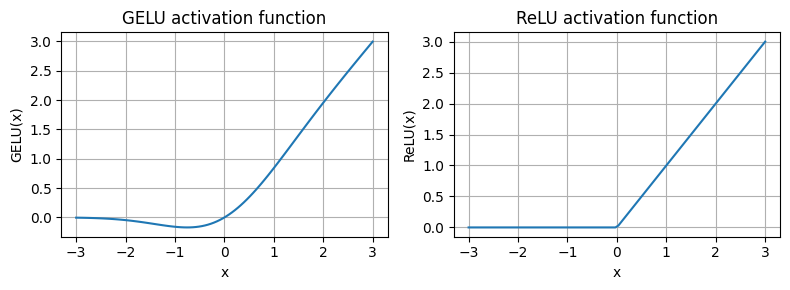

In [104]:
import matplotlib.pyplot as plt
# 实例化GELU和ReLU激活函数
gelu, relu = GELU(), nn.ReLU()
# 创建100个样本数据点，范围从-3到3
x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)
plt.figure(figsize=(8, 3))
# 遍历GELU和ReLU的输出及标签
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)
# 调整子图布局
plt.tight_layout()
# 显示图像
plt.show()

In [105]:
import torch
import torch.nn as nn

class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # 定义前馈神经网络的层序列
        self.layers = nn.Sequential(
            # 第一个线性层，输入维度为emb_dim，输出维度为4*emb_dim
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            # GELU激活函数
            GELU(),
            # 第二个线性层，输入维度为4*emb_dim，输出维度为emb_dim
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),
        )

    def forward(self, x):
        # 前向传播，将输入张量通过层序列
        return self.layers(x)

In [106]:
# 实例化前馈神经网络模块，使用GPT_CONFIG_124M配置
ffn = FeedForward(GPT_CONFIG_124M)

# 创建一个随机张量，形状为(2, 3, 768)
# 表示批量大小为2，序列长度为3，嵌入维度为768
x = torch.rand(2, 3, 768)

# 对输入张量进行前向传播
out = ffn(x)

# 打印输出张量的形状
print(out.shape)

torch.Size([2, 3, 768])


##  4.4 Adding shortcut connections

In [107]:
import torch
import torch.nn as nn

class ExampleDeepNeuralNetwork(nn.Module):
    def __init__(self, layer_sizes, use_shortcut):
        super().__init__()
        # 是否使用残差连接
        self.use_shortcut = use_shortcut
        # 定义神经网络的层列表
        self.layers = nn.ModuleList([
            # 第一层：线性层 + GELU激活函数
            nn.Sequential(nn.Linear(layer_sizes[0], layer_sizes[1]), GELU()),
            # 第二层：线性层 + GELU激活函数
            nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[2]), GELU()),
            # 第三层：线性层 + GELU激活函数
            nn.Sequential(nn.Linear(layer_sizes[2], layer_sizes[3]), GELU()),
            # 第四层：线性层 + GELU激活函数
            nn.Sequential(nn.Linear(layer_sizes[3], layer_sizes[4]), GELU()),
            # 第五层：线性层 + GELU激活函数
            nn.Sequential(nn.Linear(layer_sizes[4], layer_sizes[5]), GELU())
        ])

    def forward(self, x):
        # 遍历每一层
        for layer in self.layers:
            # 计算当前层的输出
            layer_output = layer(x)
            # 如果使用残差连接且输入和输出形状一致
            if self.use_shortcut and x.shape == layer_output.shape:
                # 应用残差连接，输入加上当前层的输出
                x = x + layer_output
            else:
                # 否则，直接使用当前层的输出
                x = layer_output
        # 返回最终的输出
        return x

In [108]:
import torch
import torch.nn as nn

# 定义神经网络的层大小
layer_sizes = [3, 3, 3, 3, 3, 1]

# 创建一个样本输入张量
sample_input = torch.tensor([[1., 0., -1.]])

# 设置随机种子，确保结果可复现
torch.manual_seed(123)

# 实例化不使用残差连接的深度神经网络模型
model_without_shortcut = ExampleDeepNeuralNetwork(
    layer_sizes, use_shortcut=False
)

In [109]:
import torch
import torch.nn as nn

def print_gradients(model, x):
    # 前向传播，计算模型的输出
    output = model(x)
    # 定义目标张量
    target = torch.tensor([[0.]])
    # 定义均方误差损失函数
    loss = nn.MSELoss()
    # 计算损失
    loss = loss(output, target)
    # 反向传播，计算梯度
    loss.backward()

    # 遍历模型的所有参数
    for name, param in model.named_parameters():
        # 如果参数名称包含'weight'
        if 'weight' in name:
            # 打印参数的梯度均值
            print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")

In [110]:
print_gradients(model_without_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.00020173587836325169
layers.1.0.weight has gradient mean of 0.00012011159560643137
layers.2.0.weight has gradient mean of 0.0007152040489017963
layers.3.0.weight has gradient mean of 0.0013988736318424344
layers.4.0.weight has gradient mean of 0.005049645435065031


In [111]:
import torch
import torch.nn as nn

# 设置随机种子，确保结果可复现
torch.manual_seed(123)

# 实例化使用残差连接的深度神经网络模型
model_with_shortcut = ExampleDeepNeuralNetwork(
    layer_sizes, use_shortcut=True
)

# 计算模型的梯度并打印参数的梯度均值
print_gradients(model_with_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.22169798612594604
layers.1.0.weight has gradient mean of 0.20694111287593842
layers.2.0.weight has gradient mean of 0.3289700150489807
layers.3.0.weight has gradient mean of 0.26657330989837646
layers.4.0.weight has gradient mean of 1.3258544206619263


## 4.5  Connecting attention and linear layers in a transformer block

In [112]:
import torch
import torch.nn as nn
# import MultiHeadAttention

class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # 定义多头注意力模块
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"],
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"]
        )
        # 定义前馈神经网络模块
        self.ff = FeedForward(cfg)
        # 定义层归一化模块
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        # 定义dropout模块
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):
        # 保存原始输入作为残差连接
        shortcut = x
        # 应用层归一化
        x = self.norm1(x)
        # 应用多头注意力
        x = self.att(x)
        # 应用dropout
        x = self.drop_shortcut(x)
        # 应用残差连接
        x = x + shortcut

        # 保存当前输入作为残差连接
        shortcut = x
        # 应用层归一化
        x = self.norm2(x)
        # 应用前馈神经网络
        x = self.ff(x)
        # 应用dropout
        x = self.drop_shortcut(x)
        # 应用残差连接
        x = x + shortcut

        # 返回最终的输出
        return x

In [113]:
import torch
import torch.nn as nn

# 设置随机种子，确保结果可复现
torch.manual_seed(123)

# 创建一个随机张量，形状为(2, 4, 768)
# 表示批量大小为2，序列长度为4，嵌入维度为768
x = torch.rand(2, 4, 768)

# 实例化Transformer块，使用GPT_CONFIG_124M配置
block = TransformerBlock(GPT_CONFIG_124M)

# 对输入张量进行前向传播
output = block(x)

# 打印输入张量的形状
print("Input shape:", x.shape)

# 打印输出张量的形状
print("Output shape:", output.shape)

Input shape: torch.Size([2, 4, 768])
Output shape: torch.Size([2, 4, 768])


## 4.6 Coding the GPT model

In [114]:
import torch
import torch.nn as nn

class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # 定义词嵌入层
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        # 定义位置嵌入层
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        # 定义dropout层
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        # 定义Transformer块序列
        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])]
        )

        # 定义最终的层归一化
        self.final_norm = LayerNorm(cfg["emb_dim"])
        # 定义输出头
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        # 获取输入的批量大小和序列长度
        batch_size, seq_len = in_idx.shape
        # 计算词嵌入
        tok_embeds = self.tok_emb(in_idx)
        # 计算位置嵌入
        pos_embeds = self.pos_emb(
            torch.arange(seq_len, device=in_idx.device)
        )
        # 词嵌入加上位置嵌入
        x = tok_embeds + pos_embeds
        # 应用dropout
        x = self.drop_emb(x)
        # 通过Transformer块序列
        x = self.trf_blocks(x)
        # 应用最终的层归一化
        x = self.final_norm(x)
        # 计算输出logits
        logits = self.out_head(x)
        # 返回logits
        return logits

In [115]:
import torch
import torch.nn as nn

# 设置随机种子，确保结果可复现
torch.manual_seed(123)

# 实例化GPT模型，使用GPT_CONFIG_124M配置
model = GPTModel(GPT_CONFIG_124M)

# 对输入批次进行前向传播
out = model(batch)

# 打印输入批次
print("Input batch:\n", batch)

# 打印输出形状
print("Output shape:", out.shape)

# 打印输出结果
print(out)

Input batch:
 tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])
Output shape: torch.Size([2, 4, 50257])
tensor([[[ 0.1381,  0.0077, -0.1963,  ..., -0.0222, -0.1060,  0.1717],
         [ 0.3865, -0.8408, -0.6564,  ..., -0.5163,  0.2369, -0.3357],
         [ 0.6989, -0.1829, -0.1631,  ...,  0.1472, -0.6504, -0.0056],
         [-0.4290,  0.1669, -0.1258,  ...,  1.1579,  0.5303, -0.5549]],

        [[ 0.1094, -0.2894, -0.1467,  ..., -0.0557,  0.2911, -0.2824],
         [ 0.0882, -0.3552, -0.3527,  ...,  1.2930,  0.0053,  0.1898],
         [ 0.6091,  0.4702, -0.4094,  ...,  0.7688,  0.3787, -0.1974],
         [-0.0612, -0.0737,  0.4751,  ...,  1.2463, -0.3834,  0.0609]]],
       grad_fn=<UnsafeViewBackward0>)


In [116]:
import torch
import torch.nn as nn

# 计算模型的总参数数量
total_params = sum(p.numel() for p in model.parameters())

# 打印总参数数量
print(f"Total number of parameters: {total_params:,}")

Total number of parameters: 163,009,536


In [117]:
import torch
import torch.nn as nn

# 打印词嵌入层的权重形状
print("Token embedding layer shape:", model.tok_emb.weight.shape)

# 打印输出层的权重形状
print("Output layer shape:", model.out_head.weight.shape)

Token embedding layer shape: torch.Size([50257, 768])
Output layer shape: torch.Size([50257, 768])


In [118]:
import torch
import torch.nn as nn

# 计算考虑权重绑定后的可训练参数数量
total_params_gpt2 = (
    total_params - sum(p.numel() for p in model.out_head.parameters())
)

# 打印结果
print(f"Number of trainable parameters "
      f"considering weight tying: {total_params_gpt2:,}")

Number of trainable parameters considering weight tying: 124,412,160


In [119]:
import torch
import torch.nn as nn

# 计算模型的总大小（字节）
total_size_bytes = total_params * 4

# 将总大小转换为兆字节
total_size_mb = total_size_bytes / (1024 * 1024)

# 打印模型的总大小
print(f"Total size of the model: {total_size_mb:.2f} MB")

Total size of the model: 621.83 MB


## 4.7  Generating text

In [120]:
import torch
import torch.nn as nn

def generate_text_simple(model, idx, max_new_tokens, context_size):
    # 裁剪当前上下文，使其不超过支持的上下文大小
    for _ in range(max_new_tokens):
        idx_cond = idx[:, -context_size:]
        with torch.no_grad():
            # 获取模型的输出logits
            logits = model(idx_cond)
        # 聚焦于最后一个时间步
        logits = logits[:, -1, :]
        # 将logits转换为概率
        probs = torch.softmax(logits, dim=-1)
        # 采样下一个token的索引
        idx_next = torch.argmax(probs, dim=-1, keepdim=True)
        # 将采样的token索引添加到运行序列中
        idx = torch.cat((idx, idx_next), dim=1)
    # 返回生成的序列
    return idx

In [121]:
from transformers import AutoTokenizer

# 定义起始文本
start_context = "Hello, I am"

# 使用分词器对起始文本进行编码
encoded = tokenizer.encode(start_context)

# 打印编码结果
print("encoded:", encoded)

# 将编码结果转换为张量，并添加批次维度
encoded_tensor = torch.tensor(encoded).unsqueeze(0)

# 打印张量的形状
print("encoded_tensor.shape:", encoded_tensor.shape)

encoded: [15496, 11, 314, 716]
encoded_tensor.shape: torch.Size([1, 4])


In [122]:
import torch
import torch.nn as nn

# 将模型设置为评估模式，禁用dropout
model.eval()

# 使用简单的文本生成函数生成新的文本序列
out = generate_text_simple(
    model=model,
    idx=encoded_tensor,
    max_new_tokens=6,
    context_size=GPT_CONFIG_124M["context_length"]
)

# 打印生成的序列
print("Output:", out)

# 打印生成的序列长度
print("Output length:", len(out[0]))

Output: tensor([[15496,    11,   314,   716, 27018, 24086, 47843, 30961, 42348,  7267]])
Output length: 10


In [123]:
from transformers import AutoTokenizer

# 将生成的张量转换为列表，并移除批次维度
decoded_text = tokenizer.decode(out.squeeze(0).tolist())

# 打印解码后的文本
print(decoded_text)

Hello, I am Featureiman Byeswickattribute argue


# 5 Pretraining on unlabeled data

## 5.1  Evaluating generative text models

### 5.1.1 Using GPT to generate text

In [124]:
import torch
# from chapter04 import GPTModel

# 定义GPT模型的配置
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 256,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}

# 设置随机种子，确保结果可复现
torch.manual_seed(123)

# 实例化GPT模型，使用GPT_CONFIG_124M配置
model = GPTModel(GPT_CONFIG_124M)

# 将模型设置为评估模式，禁用dropout
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features

In [125]:
import torch
import tiktoken
# from chapter04 import generate_text_simple

def text_to_token_ids(text, tokenizer):
    # 将文本编码为token索引
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    # 转换为张量并添加批次维度
    encoded_tensor = torch.tensor(encoded).unsqueeze(0)
    return encoded_tensor

def token_ids_to_text(token_ids, tokenizer):
    # 移除批次维度
    flat = token_ids.squeeze(0)
    # 将token索引解码为文本
    return tokenizer.decode(flat.tolist())

# 定义起始文本
start_context = "Every effort moves you"

# 加载GPT-2的分词器
tokenizer = tiktoken.get_encoding("gpt2")

# 生成新的文本序列
token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(start_context, tokenizer),
    max_new_tokens=10,
    context_size=GPT_CONFIG_124M["context_length"]
)

# 将生成的token索引转换回文本并打印
print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you rentingetic wasnم refres RexMeCHicular stren


### 5.1.2  Calculating the text generation loss

In [126]:
inputs = torch.tensor([[16833, 3626, 6100],   # ["every effort moves",
             [40,    1107, 588]])   #  "I really like"]

In [127]:
targets = torch.tensor([[3626, 6100, 345  ],  # [" effort moves you",
             [1107, 588, 11311]])  #  " really like chocolate"]

In [128]:
import torch
import torch.nn as nn

# 禁用梯度跟踪，提高性能并减少内存占用
with torch.no_grad():
    # 获取模型的输出logits
    logits = model(inputs)
    # 将logits转换为概率分布
    probs = torch.softmax(logits, dim=-1)
    # 打印概率分布的形状
    print(probs.shape)

torch.Size([2, 3, 50257])


In [129]:
import torch
import torch.nn as nn

# 从概率分布中获取每个位置的最可能token索引
token_ids = torch.argmax(probs, dim=-1, keepdim=True)

# 打印token索引
print("Token IDs:\n", token_ids)

Token IDs:
 tensor([[[16657],
         [  339],
         [42826]],

        [[49906],
         [29669],
         [41751]]])


In [130]:
import torch
import torch.nn as nn

# 打印目标批次的第一个样本
print(f"Targets batch 1: {token_ids_to_text(targets[0], tokenizer)}")

# 打印生成的token索引的第一个样本
print(f"Outputs batch 1: {token_ids_to_text(token_ids[0].flatten(), tokenizer)}")

Targets batch 1:  effort moves you
Outputs batch 1:  Armed heNetflix


In [131]:
import torch
import torch.nn as nn

# 定义文本索引
text_idx = 0

# 计算目标token在概率分布中的概率值
target_probas_1 = probs[text_idx, [0, 1, 2], targets[text_idx]]

# 打印结果
print("Text 1:", target_probas_1)

# 定义文本索引
text_idx = 1

# 计算目标token在概率分布中的概率值
target_probas_2 = probs[text_idx, [0, 1, 2], targets[text_idx]]

# 打印结果
print("Text 2:", target_probas_2)

Text 1: tensor([    0.0001,     0.0000,     0.0000])
Text 2: tensor([    0.0000,     0.0001,     0.0000])


In [132]:
import torch
import torch.nn as nn

# 计算目标token概率的对数
log_probas = torch.log(torch.cat((target_probas_1, target_probas_2)))

# 打印结果
print(log_probas)

tensor([ -9.5042, -10.3796, -11.3677, -11.4798,  -9.7764, -12.2561])


In [133]:
# 计算对数概率的平均值
avg_log_probas = torch.mean(log_probas)

# 打印结果
print(avg_log_probas)

tensor(-10.7940)


In [134]:
# 将平均对数概率取反
neg_avg_log_probas = avg_log_probas * -1

# 打印结果
print(neg_avg_log_probas)

tensor(10.7940)


In [135]:
print("Logits shape:", logits.shape)
print("Targets shape:", targets.shape)

Logits shape: torch.Size([2, 3, 50257])
Targets shape: torch.Size([2, 3])


In [136]:
import torch
import torch.nn as nn

# 将logits张量展平
logits_flat = logits.flatten(0, 1)

# 将targets张量展平
targets_flat = targets.flatten()

# 打印展平后的logits形状
print("Flattened logits:", logits_flat.shape)

# 打印展平后的targets形状
print("Flattened targets:", targets_flat.shape)

Flattened logits: torch.Size([6, 50257])
Flattened targets: torch.Size([6])


In [137]:
# 计算交叉熵损失
loss = torch.nn.functional.cross_entropy(logits_flat, targets_flat)
print(loss)

tensor(10.7940)


### 5.1.3  Calculating the training and validation set losses

In [138]:
# 定义文件路径
file_path = "the-verdict.txt"

# 以只读模式打开文件，指定编码为UTF-8
with open(file_path, "r", encoding="utf-8") as file:
    # 读取文件内容
    text_data = file.read()

In [139]:
# 计算文本数据的字符总数
total_characters = len(text_data)

# 计算文本数据的token总数
total_tokens = len(tokenizer.encode(text_data))

# 打印字符总数
print("Characters:", total_characters)

# 打印token总数
print("Tokens:", total_tokens)

Characters: 20479
Tokens: 5145


In [140]:
# 定义训练集比例
train_ratio = 0.90

# 计算分割索引
split_idx = int(train_ratio * len(text_data))

# 分割为训练集和验证集
train_data = text_data[:split_idx]
val_data = text_data[split_idx:]

In [141]:
# from chapter02 import create_dataloader_v1

# 设置随机种子，确保结果可复现
torch.manual_seed(123)

# 创建训练集的数据加载器
train_loader = create_dataloader_v1(
    train_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=True,
    shuffle=True,
    num_workers=0
)

# 创建验证集的数据加载器
val_loader = create_dataloader_v1(
    val_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=False,
    shuffle=False,
    num_workers=0
)

In [142]:
# 打印训练集数据加载器的批次形状
print("Train loader:")
for x, y in train_loader:
    print(x.shape, y.shape)

# 打印验证集数据加载器的批次形状
print("\nValidation loader:")
for x, y in val_loader:
    print(x.shape, y.shape)

Train loader:
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])

Validation loader:
torch.Size([2, 256]) torch.Size([2, 256])


In [143]:
def calc_loss_batch(input_batch, target_batch, model, device):
    # 将输入数据和目标数据移动到指定设备（如GPU）
    input_batch = input_batch.to(device)
    target_batch = target_batch.to(device)

    # 获取模型的输出logits
    logits = model(input_batch)

    # 计算交叉熵损失
    loss = torch.nn.functional.cross_entropy(
        logits.flatten(0, 1),  # 展平logits张量
        target_batch.flatten()  # 展平目标张量
    )

    # 返回损失
    return loss

In [144]:
def calc_loss_loader(data_loader, model, device, num_batches=None):
    # 初始化总损失
    total_loss = 0

    # 处理空数据加载器的情况
    if len(data_loader) == 0:
        return float("nan")

    # 确定要处理的批次数量
    if num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches = min(num_batches, len(data_loader))

    # 遍历数据加载器中的批次
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            # 计算单个批次的损失
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            # 累加损失
            total_loss += loss.item()
        else:
            break

    # 返回平均损失
    return total_loss / num_batches

In [145]:
import torch
# 检查是否有CUDA支持的GPU，否则使用CPU
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"

# 将模型移动到指定设备
model.to(device)

# 禁用梯度跟踪，提高性能并减少内存占用
with torch.no_grad():
    # 计算训练集的损失
    train_loss = calc_loss_loader(train_loader, model, device)
    # 计算验证集的损失
    val_loss = calc_loss_loader(val_loader, model, device)

# 打印训练集损失
print("Training loss:", train_loss)
# 打印验证集损失
print("Validation loss:", val_loss)

Training loss: 10.987583584255642
Validation loss: 10.98110580444336


## 5.2  Training an LLM

In [146]:
def train_model_simple(
    model, train_loader, val_loader,
    optimizer, device, num_epochs,
    eval_freq, eval_iter, start_context, tokenizer
):
    # 初始化损失列表和token统计
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen, global_step = 0, -1

    # 主训练循环
    for epoch in range(num_epochs):
        # 设置模型为训练模式
        model.train()
        # 遍历训练集
        for input_batch, target_batch in train_loader:
            # 更新全局步数
            global_step += 1
            # 重置梯度
            optimizer.zero_grad()
            # 计算损失
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            # 反向传播
            loss.backward()
            # 更新模型参数
            optimizer.step()
            # 更新已处理的token数
            tokens_seen += input_batch.numel()

            # 定期评估模型
            if global_step % eval_freq == 0:
                # 评估模型
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter
                )
                # 记录损失
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                # 打印损失
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, "
                      f"Val loss {val_loss:.3f}")

        # 生成并打印示例文本
        generate_and_print_sample(
            model, tokenizer, device, start_context
        )

    # 返回训练历史
    return train_losses, val_losses, track_tokens_seen

In [147]:
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    # 禁用梯度计算，提高性能并减少内存占用
    with torch.no_grad():
        # 计算训练集的损失
        train_loss = calc_loss_loader(
            train_loader, model, device, num_batches=eval_iter
        )
        # 计算验证集的损失
        val_loss = calc_loss_loader(
            val_loader, model, device, num_batches=eval_iter
        )

    # 设置模型为评估模式
    model.eval()

    # 返回训练集和验证集的损失
    return train_loss, val_loss

In [148]:
def generate_and_print_sample(model, tokenizer, device, start_context):
    # 设置模型为评估模式
    model.eval()

    # 获取模型的上下文大小
    context_size = model.pos_emb.weight.shape[0]

    # 将起始文本编码为token ID
    encoded = text_to_token_ids(start_context, tokenizer).to(device)

    # 禁用梯度计算
    with torch.no_grad():
        # 生成文本
        token_ids = generate_text_simple(
            model=model,
            idx=encoded,
            max_new_tokens=50,
            context_size=context_size
        )

    # 将token ID解码为文本
    decoded_text = token_ids_to_text(token_ids, tokenizer)

    # 打印生成的文本（去除换行符）
    print(decoded_text.replace("\n", " "))

    # 设置模型为训练模式
    model.train()

In [149]:
# 设置随机种子，确保结果可复现
torch.manual_seed(123)

# 初始化模型
model = GPTModel(GPT_CONFIG_124M)

# 将模型移动到指定设备（如GPU）
model.to(device)

# 初始化优化器
optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=0.0004,
    weight_decay=0.1
)

# 定义训练轮次
num_epochs = 10

# 开始训练模型
train_losses, val_losses, tokens_seen = train_model_simple(
    model,
    train_loader,
    val_loader,
    optimizer,
    device,
    num_epochs=num_epochs,
    eval_freq=5,
    eval_iter=5,
    start_context="Every effort moves you",
    tokenizer=tokenizer
)

Ep 1 (Step 000000): Train loss 9.831, Val loss 9.968
Ep 1 (Step 000005): Train loss 7.981, Val loss 8.328
Every effort moves you,,,,,,,,,,,,.                                     
Ep 2 (Step 000010): Train loss 6.776, Val loss 7.069
Ep 2 (Step 000015): Train loss 6.076, Val loss 6.575
Every effort moves you, and, and, and, and, and, and, and. ", and, and, and, and, and, and the, and, and, and, and, and, and, and, and, and, and
Ep 3 (Step 000020): Train loss 5.495, Val loss 6.632
Ep 3 (Step 000025): Train loss 5.154, Val loss 6.349
Every effort moves you                                                  
Ep 4 (Step 000030): Train loss 4.532, Val loss 6.341
Ep 4 (Step 000035): Train loss 3.964, Val loss 6.153
Every effort moves you know it was, and I felt--I to the picture. "Oh, I was a little--and, I had been, and I was his the, and I had been the, and of his pictures--and it's the of
Ep 5 (Step 000040): Train loss 3.999, Val loss 6.133
Every effort moves you know it was not that, and in 

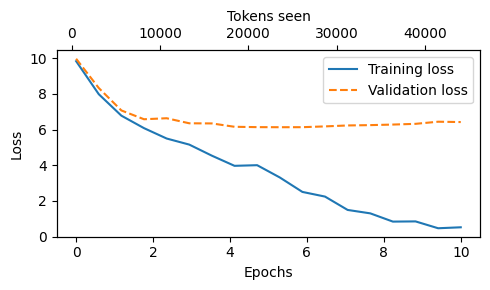

In [150]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def plot_losses(epochs_seen, tokens_seen, train_losses, val_losses):
    # 创建图形和子图
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # 绘制训练损失和验证损失随训练轮次的变化
    ax1.plot(epochs_seen, train_losses, label="Training loss")
    ax1.plot(epochs_seen, val_losses, linestyle="--", label="Validation loss")

    # 设置x轴标签
    ax1.set_xlabel("Epochs")
    # 设置y轴标签
    ax1.set_ylabel("Loss")
    # 设置图例位置
    ax1.legend(loc="upper right")
    # 设置x轴为整数刻度
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

    # 创建第二个x轴，共享y轴
    ax2 = ax1.twiny()
    # 绘制处理token数的不可见曲线，用于对齐刻度
    ax2.plot(tokens_seen, train_losses, alpha=0)
    # 设置第二个x轴标签
    ax2.set_xlabel("Tokens seen")

    # 自动调整子图布局
    fig.tight_layout()
    # 显示图形
    plt.show()

# 创建训练轮次的张量
epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))

# 调用plot_losses函数绘制损失曲线
plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)

## 5.3 Decoding strategies to control randomness

In [151]:
# 将模型移动到CPU
model.to("cpu")

# 设置模型为评估模式
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features

In [152]:
# 获取GPT-2分词器
tokenizer = tiktoken.get_encoding("gpt2")

# 生成文本
token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids("Every effort moves you", tokenizer),
    max_new_tokens=25,
    context_size=GPT_CONFIG_124M["context_length"]
)

# 将生成的token ID解码为文本并打印
print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you?"

"Yes--quite insensible to the irony. She wanted him vindicated--and by me!"




### 5.3.1  Temperature scaling

In [153]:
# 定义词汇表
vocab = {
    "closer": 0,
    "every": 1,
    "effort": 2,
    "forward": 3,
    "inches": 4,
    "moves": 5,
    "pizza": 6,
    "toward": 7,
    "you": 8,
}

# 定义反向词汇表
inverse_vocab = {v: k for k, v in vocab.items()}

In [154]:
# 定义下一个token的logits张量
next_token_logits = torch.tensor([4.51, 0.89, -1.90, 6.75, 1.63, -1.62, -1.89, 6.28, 1.79])

In [155]:
# 将logits转换为概率分布
probs = torch.softmax(next_token_logits, dim=0)

# 选择概率最高的token的索引
next_token_id = torch.argmax(probs).item()

# 将token索引转换为单词并打印
print(inverse_vocab[next_token_id])

forward


In [156]:
# 设置随机种子，确保结果可复现
torch.manual_seed(123)

# 从概率分布中随机选择一个token
next_token_id = torch.multinomial(probs, num_samples=1).item()

# 将token索引转换为单词并打印
print(inverse_vocab[next_token_id])

toward


In [157]:
def print_sampled_tokens(probs):
    # 设置随机种子，确保结果可复现
    torch.manual_seed(123)

    # 从概率分布中采样1000个token
    sample = [torch.multinomial(probs, num_samples=1).item() for _ in range(1000)]

    # 计算每个token的频率
    sampled_ids = torch.bincount(torch.tensor(sample))

    # 打印每个token的频率和对应的单词
    for i, freq in enumerate(sampled_ids):
        print(f"{freq} x {inverse_vocab[i]}")

# 调用函数
print_sampled_tokens(probs)

71 x closer
2 x every
0 x effort
544 x forward
2 x inches
1 x moves
0 x pizza
376 x toward
4 x you


In [158]:
def softmax_with_temperature(logits, temperature):
    # 对logits进行缩放
    scaled_logits = logits / temperature
    # 计算带温度参数的softmax概率分布
    return torch.softmax(scaled_logits, dim=0)

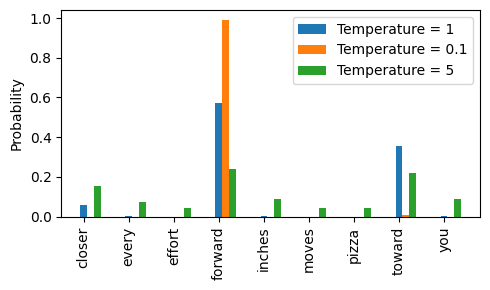

In [159]:
# 定义不同的温度参数，用于控制softmax的输出分布
# 温度为1时接近原始分布，0.1时分布更集中（高置信度），5时分布更平坦（低置信度）
temperatures = [1, 0.1, 5]

# 对每个温度参数，使用带温度的softmax函数计算概率分布
# scaled_probas将存储不同温度下的概率分布列表
scaled_probas = [softmax_with_temperature(next_token_logits, T) for T in temperatures]

# 生成x轴的位置坐标，用于绘制柱状图
# x的长度等于词汇表的大小，每个位置对应一个词汇
x = torch.arange(len(vocab))

# 定义柱状图的宽度，用于控制不同温度下柱状图的间距
bar_width = 0.15

# 创建一个图形和子图对象，设置图形大小为5x3英寸
fig, ax = plt.subplots(figsize=(5, 3))

# 遍历每个温度参数及其索引
for i, T in enumerate(temperatures):
    # 绘制当前温度下的概率分布柱状图
    # x + i * bar_width：计算每个温度下柱状图的x轴位置
    # scaled_probas[i]：当前温度下的概率分布，作为柱状图的高度
    # bar_width：柱状图的宽度
    # label：为当前温度的柱状图添加图例标签
    rects = ax.bar(
        x + i * bar_width,
        scaled_probas[i],
        bar_width,
        label=f"Temperature = {T}"
    )

# 设置y轴的标签为"Probability"，表示y轴显示的是概率值
ax.set_ylabel('Probability')

# 设置x轴的刻度位置，与x的长度对应
ax.set_xticks(x)

# 设置x轴的刻度标签为词汇表中的单词，旋转90度以避免重叠
ax.set_xticklabels(vocab.keys(), rotation=90)

# 显示图例，解释不同颜色柱状图对应的温度参数
ax.legend()

# 自动调整子图布局，确保所有元素都能正确显示
plt.tight_layout()

# 显示绘制的图形
plt.show()

### 5.3.2  Top-k sampling

In [160]:
# 定义要获取的top token数量
top_k = 3

# 获取概率最高的前k个token的logits和位置
top_logits, top_pos = torch.topk(next_token_logits, top_k)

# 打印概率最高的前k个token的logits
print("Top logits:", top_logits)

# 打印概率最高的前k个token的位置
print("Top positions:", top_pos)

Top logits: tensor([6.7500, 6.2800, 4.5100])
Top positions: tensor([3, 7, 0])


In [161]:
# torch.where 是 PyTorch 中用于根据条件选择元素的函数
# 使用torch.where函数将低于top_logits[-1]的logits设置为-∞
new_logits = torch.where(
    # 条件：logits小于top_logits中的最小值
    condition=next_token_logits < top_logits[-1],
    # 满足条件时，设置为-∞
    input=torch.tensor(float('-inf')),
    # 不满足条件时，保留原logits
    other=next_token_logits
)

# 打印处理后的logits
print(new_logits)

tensor([4.5100,   -inf,   -inf, 6.7500,   -inf,   -inf,   -inf, 6.2800,   -inf])


In [162]:
# 对处理后的logits应用softmax函数，生成概率分布
topk_probas = torch.softmax(new_logits, dim=0)

# 打印生成的概率分布
print(topk_probas)

tensor([0.0615, 0.0000, 0.0000, 0.5775, 0.0000, 0.0000, 0.0000, 0.3610, 0.0000])


### 5.3.3 Modifying the text generation function

In [163]:
def generate(
    model, idx, max_new_tokens, context_size,
    temperature=0.0, top_k=None, eos_id=None
):
    # 生成指定数量的新token
    for _ in range(max_new_tokens):
        # 截取最后context_size个token作为条件
        idx_cond = idx[:, -context_size:]

        # 禁用梯度计算
        with torch.no_grad():
            # 获取模型的预测logits
            logits = model(idx_cond)

        # 只关注最后一个时间步的预测
        logits = logits[:, -1, :]

        # 如果指定了top_k，应用top_k采样
        if top_k is not None:
            # 获取top_k的logits和位置
            top_logits, _ = torch.topk(logits, top_k)
            # 获取top_k中的最小值
            min_val = top_logits[:, -1]
            # 将低于最小值的logits设置为-∞
            logits = torch.where(
                logits < min_val[:, None],
                torch.tensor(float('-inf')).to(logits.device),
                logits
            )

        # 如果温度大于0，应用温度缩放
        if temperature > 0.0:
            # 对logits进行温度缩放
            logits = logits / temperature
            # 转换为概率分布
            probs = torch.softmax(logits, dim=-1)
            # 从概率分布中采样
            idx_next = torch.multinomial(probs, num_samples=1)
        else:
            # 否则，使用贪婪解码
            idx_next = torch.argmax(logits, dim=-1, keepdim=True)

        # 如果生成了结束token，提前停止生成
        if idx_next == eos_id:
            break

        # 将新生成的token添加到序列中
        idx = torch.cat((idx, idx_next), dim=1)

    # 返回生成的序列
    return idx

In [164]:
# 设置随机种子，确保结果可复现
torch.manual_seed(123)

# 生成文本
token_ids = generate(
    model=model,
    idx=text_to_token_ids("Every effort moves you", tokenizer),
    max_new_tokens=15,
    context_size=GPT_CONFIG_124M["context_length"],
    top_k=25,
    temperature=1.4
)

# 将生成的token ID解码为文本并打印
print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you know I meant to a little wild--I was such struck by his last


## 5.4  Loading and saving model weights in PyTorch

In [165]:
torch.save(model.state_dict(), "model.pth")

In [166]:
# 初始化GPT模型
model = GPTModel(GPT_CONFIG_124M)

# 加载预训练的模型权重
model.load_state_dict(torch.load("model.pth", map_location=device))

# 设置模型为评估模式
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features

In [167]:
# 保存模型和优化器的状态
torch.save({
    # 模型的状态字典
    "model_state_dict": model.state_dict(),
    # 优化器的状态字典
    "optimizer_state_dict": optimizer.state_dict(),
}, "model_and_optimizer.pth")

In [168]:
# 加载保存的模型和优化器状态
checkpoint = torch.load("model_and_optimizer.pth", map_location=device)

# 初始化GPT模型
model = GPTModel(GPT_CONFIG_124M)

# 加载模型的状态字典
model.load_state_dict(checkpoint["model_state_dict"])

# 初始化优化器
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-4, weight_decay=0.1)

# 加载优化器的状态字典
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])

# 设置模型为训练模式
model.train()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features

## 5.5  Loading pretrained weights from OpenAI

In [169]:
pip install tensorflow>=2.15.0  tqdm>=4.66

In [170]:
# 导入urllib.request模块，用于处理URL请求
import urllib.request

# 定义要下载的文件的URL
url = (
    "https://raw.githubusercontent.com/rasbt/"
    "LLMs-from-scratch/main/ch05/"
    "01_main-chapter-code/gpt_download.py"
)

# 从URL中提取文件名
filename = url.split('/')[-1]

# 下载文件并保存到本地
urllib.request.urlretrieve(url, filename)

('gpt_download.py', <http.client.HTTPMessage at 0x7834a9698e50>)

In [171]:
# 从gpt_download模块中导入download_and_load_gpt2函数
from gpt_download import download_and_load_gpt2

# 下载并加载GPT-2模型的设置和参数
settings, params = download_and_load_gpt2(
    model_size="124M",  # 指定模型大小为124M
    models_dir="gpt2"    # 指定模型保存的目录为gpt2
)

File already exists and is up-to-date: gpt2/124M/checkpoint
File already exists and is up-to-date: gpt2/124M/encoder.json
File already exists and is up-to-date: gpt2/124M/hparams.json
File already exists and is up-to-date: gpt2/124M/model.ckpt.data-00000-of-00001
File already exists and is up-to-date: gpt2/124M/model.ckpt.index
File already exists and is up-to-date: gpt2/124M/model.ckpt.meta
File already exists and is up-to-date: gpt2/124M/vocab.bpe


In [172]:
print("Settings:", settings)
print("Parameter dictionary keys:", params.keys())

Settings: {'n_vocab': 50257, 'n_ctx': 1024, 'n_embd': 768, 'n_head': 12, 'n_layer': 12}
Parameter dictionary keys: dict_keys(['blocks', 'b', 'g', 'wpe', 'wte'])


In [173]:
print(params["wte"])
print("Token embedding weight tensor dimensions:", params["wte"].shape)

[[-0.11010301 -0.03926672  0.03310751 ... -0.1363697   0.01506208
   0.04531523]
 [ 0.04034033 -0.04861503  0.04624869 ...  0.08605453  0.00253983
   0.04318958]
 [-0.12746179  0.04793796  0.18410145 ...  0.08991534 -0.12972379
  -0.08785918]
 ...
 [-0.04453601 -0.05483596  0.01225674 ...  0.10435229  0.09783269
  -0.06952604]
 [ 0.1860082   0.01665728  0.04611587 ... -0.09625227  0.07847701
  -0.02245961]
 [ 0.05135201 -0.02768905  0.0499369  ...  0.00704835  0.15519823
   0.12067825]]
Token embedding weight tensor dimensions: (50257, 768)


In [174]:
model_configs = {
    # GPT-2 Small 模型配置
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    # GPT-2 Medium 模型配置
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    # GPT-2 Large 模型配置
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    # GPT-2 XL 模型配置
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

In [175]:
# 定义模型名称
model_name = "gpt2-small (124M)"

NEW_CONFIG = GPT_CONFIG_124M.copy()

# 更新新的配置字典，添加指定模型的配置信息
NEW_CONFIG.update(model_configs[model_name])

In [176]:
NEW_CONFIG.update({"context_length": 1024})

In [177]:
NEW_CONFIG.update({"qkv_bias": True})

In [178]:
# 使用新的配置创建 GPT 模型
# NEW_CONFIG
gpt = GPTModel(NEW_CONFIG)

# 设置模型为评估模式
gpt.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=7

In [179]:
def assign(left, right):
    # 检查左侧和右侧张量的形状是否一致
    if left.shape != right.shape:
        # 如果形状不一致，抛出 ValueError 异常
        raise ValueError(f"Shape mismatch. Left: {left.shape}, Right: {right.shape}")

    # 将右侧张量转换为 Parameter 类型并返回
    return torch.nn.Parameter(torch.tensor(right))

In [180]:
import numpy as np

def load_weights_into_gpt(gpt, params):
    # 加载位置嵌入权重
    gpt.pos_emb.weight = assign(gpt.pos_emb.weight, params["wpe"])
    # 加载词嵌入权重
    gpt.tok_emb.weight = assign(gpt.tok_emb.weight, params["wte"])

    # 遍历每个 Transformer 块
    for b in range(len(params["blocks"])):
        # 分割注意力权重为查询、键和值三部分
        q_w, k_w, v_w = np.split(params["blocks"][b]["attn"]["c_attn"]["w"], 3, axis=-1)
        # 加载查询权重
        gpt.trf_blocks[b].att.W_query.weight = assign(
            gpt.trf_blocks[b].att.W_query.weight, q_w.T)
        # 加载键权重
        gpt.trf_blocks[b].att.W_key.weight = assign(
            gpt.trf_blocks[b].att.W_key.weight, k_w.T)
        # 加载值权重
        gpt.trf_blocks[b].att.W_value.weight = assign(
            gpt.trf_blocks[b].att.W_value.weight, v_w.T)

        # 分割注意力偏置为查询、键和值三部分
        q_b, k_b, v_b = np.split(params["blocks"][b]["attn"]["c_attn"]["b"], 3, axis=-1)
        # 加载查询偏置
        gpt.trf_blocks[b].att.W_query.bias = assign(
            gpt.trf_blocks[b].att.W_query.bias, q_b)
        # 加载键偏置
        gpt.trf_blocks[b].att.W_key.bias = assign(
            gpt.trf_blocks[b].att.W_key.bias, k_b)
        # 加载值偏置
        gpt.trf_blocks[b].att.W_value.bias = assign(
            gpt.trf_blocks[b].att.W_value.bias, v_b)

        # 加载输出投影权重
        gpt.trf_blocks[b].att.out_proj.weight = assign(
            gpt.trf_blocks[b].att.out_proj.weight,
            params["blocks"][b]["attn"]["c_proj"]["w"].T)
        # 加载输出投影偏置
        gpt.trf_blocks[b].att.out_proj.bias = assign(
            gpt.trf_blocks[b].att.out_proj.bias,
            params["blocks"][b]["attn"]["c_proj"]["b"])

        # 加载前馈网络第一层权重
        gpt.trf_blocks[b].ff.layers[0].weight = assign(
            gpt.trf_blocks[b].ff.layers[0].weight,
            params["blocks"][b]["mlp"]["c_fc"]["w"].T)
        # 加载前馈网络第一层偏置
        gpt.trf_blocks[b].ff.layers[0].bias = assign(
            gpt.trf_blocks[b].ff.layers[0].bias,
            params["blocks"][b]["mlp"]["c_fc"]["b"])
        # 加载前馈网络第二层权重
        gpt.trf_blocks[b].ff.layers[2].weight = assign(
            gpt.trf_blocks[b].ff.layers[2].weight,
            params["blocks"][b]["mlp"]["c_proj"]["w"].T)
        # 加载前馈网络第二层偏置
        gpt.trf_blocks[b].ff.layers[2].bias = assign(
            gpt.trf_blocks[b].ff.layers[2].bias,
            params["blocks"][b]["mlp"]["c_proj"]["b"])

        # 加载第一层归一化的缩放参数
        gpt.trf_blocks[b].norm1.scale = assign(
            gpt.trf_blocks[b].norm1.scale,
            params["blocks"][b]["ln_1"]["g"])
        # 加载第一层归一化的移位参数
        gpt.trf_blocks[b].norm1.shift = assign(
            gpt.trf_blocks[b].norm1.shift,
            params["blocks"][b]["ln_1"]["b"])
        # 加载第二层归一化的缩放参数
        gpt.trf_blocks[b].norm2.scale = assign(
            gpt.trf_blocks[b].norm2.scale,
            params["blocks"][b]["ln_2"]["g"])
        # 加载第二层归一化的移位参数
        gpt.trf_blocks[b].norm2.shift = assign(
            gpt.trf_blocks[b].norm2.shift,
            params["blocks"][b]["ln_2"]["b"])

    # 加载最终归一化的缩放参数
    gpt.final_norm.scale = assign(gpt.final_norm.scale, params["g"])
    # 加载最终归一化的移位参数
    gpt.final_norm.shift = assign(gpt.final_norm.shift, params["b"])
    # 加载输出头权重（权重绑定）
    gpt.out_head.weight = assign(gpt.out_head.weight, params["wte"])

In [181]:
load_weights_into_gpt(gpt, params)
gpt.to(device)

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=7

In [182]:
# 设置随机种子，确保结果可复现
torch.manual_seed(123)

# 生成文本
token_ids = generate(
    model=gpt,  # 使用的模型
    idx=text_to_token_ids("Every effort moves you", tokenizer).to(device),  # 输入文本的token ID
    max_new_tokens=25,  # 生成的最大新token数
    context_size=NEW_CONFIG["context_length"],  # 上下文长度
    top_k=50,  # top_k采样的k值
    temperature=1.5  # 温度参数
)

# 将生成的token ID解码为文本并打印
print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you toward an equal share for each vote plus half. Inequality is often not an accurate representation of human worth; to know the


# 6 Fine-tuning for classification

## 6.1  Different categories of fine-tuning

## 6.2  Preparing the dataset

In [183]:
import urllib.request
import zipfile
import os
from pathlib import Path

# 定义数据集的 URL 和路径
url = "https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip"
zip_path = "sms_spam_collection.zip"
extracted_path = "sms_spam_collection"
data_file_path = Path(extracted_path) / "SMSSpamCollection.tsv"

def download_and_unzip_spam_data(url, zip_path, extracted_path, data_file_path):
    # 检查数据文件是否已存在
    if data_file_path.exists():
        print(f"{data_file_path} already exists. Skipping download and extraction.")
        return

    # 下载数据集
    with urllib.request.urlopen(url) as response:
        with open(zip_path, "wb") as out_file:
            out_file.write(response.read())

    # 解压数据集
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extracted_path)

    # 重命名文件并添加 .tsv 扩展名
    original_file_path = Path(extracted_path) / "SMSSpamCollection"
    os.rename(original_file_path, data_file_path)

    print(f"File downloaded and saved as {data_file_path}")

# 调用函数下载并解压数据集
download_and_unzip_spam_data(url, zip_path, extracted_path, data_file_path)

sms_spam_collection/SMSSpamCollection.tsv already exists. Skipping download and extraction.


In [184]:
import pandas as pd

# 读取数据集
df = pd.read_csv(
    data_file_path,  # 数据集文件路径
    sep="\t",        # 分隔符为制表符
    header=None,     # 文件没有表头
    names=["Label", "Text"]  # 指定列名
)

# 显示 DataFrame
df

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [185]:
print(df["Label"].value_counts())

Label
ham     4825
spam     747
Name: count, dtype: int64


In [186]:
def create_balanced_dataset(df):
    # 计算 "spam" 类别的样本数量
    num_spam = df[df["Label"] == "spam"].shape[0]

    # 随机采样 "ham" 类别的样本，数量与 "spam" 类别相同
    ham_subset = df[df["Label"] == "ham"].sample(
        num_spam,  # 采样数量
        random_state=123  # 随机种子，确保结果可复现
    )

    # 合并采样后的 "ham" 子集和 "spam" 类别
    balanced_df = pd.concat([
        ham_subset,  # 采样后的 "ham" 子集
        df[df["Label"] == "spam"]  # "spam" 类别
    ])

    # 返回平衡的数据集
    return balanced_df

# 创建平衡的数据集
balanced_df = create_balanced_dataset(df)

# 打印每个类别的样本数量
print(balanced_df["Label"].value_counts())

Label
ham     747
spam    747
Name: count, dtype: int64


In [187]:
# 将 "Label" 列中的类别标签映射为数字
balanced_df["Label"] = balanced_df["Label"].map({"ham": 0, "spam": 1})

In [188]:
def random_split(df, train_frac, validation_frac):
    # 打乱数据集
    df = df.sample(frac=1, random_state=123).reset_index(drop=True)

    # 计算分割索引
    train_end = int(len(df) * train_frac)
    validation_end = train_end + int(len(df) * validation_frac)

    # 分割数据集
    train_df = df[:train_end]
    validation_df = df[train_end:validation_end]
    test_df = df[validation_end:]

    # 返回分割后的数据集
    return train_df, validation_df, test_df

# 分割数据集
train_df, validation_df, test_df = random_split(balanced_df, 0.7, 0.1)

In [189]:
# 将训练集保存为 CSV 文件
train_df.to_csv("train.csv", index=None)

# 将验证集保存为 CSV 文件
validation_df.to_csv("validation.csv", index=None)

# 将测试集保存为 CSV 文件
test_df.to_csv("test.csv", index=None)

## 6.3  Creating data loaders

In [190]:
import tiktoken

# 获取 GPT-2 的分词器
tokenizer = tiktoken.get_encoding("gpt2")

# 编码特殊文本 `<|endoftext|>`
print(tokenizer.encode("<|endoftext|>", allowed_special={"<|endoftext|>"}))

[50256]


In [191]:
import torch
from torch.utils.data import Dataset

class SpamDataset(Dataset):
    def __init__(self, csv_file, tokenizer, max_length=None, pad_token_id=50256):
        # 读取 CSV 文件
        self.data = pd.read_csv(csv_file)

        # 编码文本
        self.encoded_texts = [
            tokenizer.encode(text) for text in self.data["Text"]
        ]

        # 确定最大长度
        if max_length is None:
            self.max_length = self._longest_encoded_length()
        else:
            self.max_length = max_length

        # 截断和填充文本
        self.encoded_texts = [
            encoded_text[:self.max_length]
            for encoded_text in self.encoded_texts
        ]
        self.encoded_texts = [
            encoded_text + [pad_token_id] * (self.max_length - len(encoded_text))
            for encoded_text in self.encoded_texts
        ]

    def __getitem__(self, index):
        # 获取编码后的文本和标签
        encoded = self.encoded_texts[index]
        label = self.data.iloc[index]["Label"]
        return (
            torch.tensor(encoded, dtype=torch.long),
            torch.tensor(label, dtype=torch.long)
        )

    def __len__(self):
        # 返回数据集的大小
        return len(self.data)

    def _longest_encoded_length(self):
        # 计算最长编码文本的长度
        max_length = 0
        for encoded_text in self.encoded_texts:
            encoded_length = len(encoded_text)
            if encoded_length > max_length:
                max_length = encoded_length
        return max_length

In [192]:
train_dataset = SpamDataset(
    csv_file="train.csv",  # 训练集 CSV 文件路径
    max_length=None,       # 最大长度（None 表示自动计算）
    tokenizer=tokenizer    # 分词器
)

In [193]:
print(train_dataset.max_length)

120


In [194]:
# 创建验证集数据集
val_dataset = SpamDataset(
    csv_file="validation.csv",  # 验证集 CSV 文件路径
    max_length=train_dataset.max_length,  # 最大长度与训练集一致
    tokenizer=tokenizer  # 分词器
)

# 创建测试集数据集
test_dataset = SpamDataset(
    csv_file="test.csv",  # 测试集 CSV 文件路径
    max_length=train_dataset.max_length,  # 最大长度与训练集一致
    tokenizer=tokenizer  # 分词器
)

In [195]:
from torch.utils.data import DataLoader

# 设置参数
num_workers = 0  # 工作进程数，0 表示不使用多进程
batch_size = 8  # 批大小
torch.manual_seed(123)  # 设置随机种子，确保结果可复现

# 创建训练集数据加载器
train_loader = DataLoader(
    dataset=train_dataset,  # 训练集数据集
    batch_size=batch_size,  # 批大小
    shuffle=True,  # 打乱数据
    num_workers=num_workers,  # 工作进程数
    drop_last=True  # 丢弃最后一个不完整的批次
)

# 创建验证集数据加载器
val_loader = DataLoader(
    dataset=val_dataset,  # 验证集数据集
    batch_size=batch_size,  # 批大小
    num_workers=num_workers,  # 工作进程数
    drop_last=False  # 不丢弃最后一个不完整的批次
)

# 创建测试集数据加载器
test_loader = DataLoader(
    dataset=test_dataset,  # 测试集数据集
    batch_size=batch_size,  # 批大小
    num_workers=num_workers,  # 工作进程数
    drop_last=False  # 不丢弃最后一个不完整的批次
)

In [196]:
# 遍历训练集数据加载器
for input_batch, target_batch in train_loader:
    pass  # 占位符，实际代码中可以处理批次数据

# 打印输入批次的维度
print("Input batch dimensions:", input_batch.shape)

# 打印标签批次的维度
print("Label batch dimensions", target_batch.shape)

Input batch dimensions: torch.Size([8, 120])
Label batch dimensions torch.Size([8])


In [197]:
# 打印训练集的批次数量
print(f"{len(train_loader)} training batches")

# 打印验证集的批次数量
print(f"{len(val_loader)} validation batches")

# 打印测试集的批次数量
print(f"{len(test_loader)} test batches")

130 training batches
19 validation batches
38 test batches


## 6.4  Initializing a model with pretrained weights

In [198]:
# 选择的模型
CHOOSE_MODEL = "gpt2-small (124M)"
# 输入提示
INPUT_PROMPT = "Every effort moves"

# 基础配置
BASE_CONFIG = {
    "vocab_size": 50257,  # 词汇表大小
    "context_length": 1024,  # 上下文长度
    "drop_rate": 0.0,  # Dropout 率
    "qkv_bias": True  # 查询-键-值偏置
}

# 模型配置
model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

# 更新基础配置
BASE_CONFIG.update(model_configs[CHOOSE_MODEL])

In [199]:
# 从自定义模块导入函数
from gpt_download import download_and_load_gpt2
# from chapter05 import GPTModel, load_weights_into_gpt

# 解析模型大小
model_size = CHOOSE_MODEL.split(" ")[-1].lstrip("(").rstrip(")")

# 下载并加载 GPT-2 模型
settings, params = download_and_load_gpt2(
  model_size=model_size, models_dir="gpt2"
)

# 初始化模型
model = GPTModel(BASE_CONFIG)

# 加载权重
load_weights_into_gpt(model, params)

# 设置模型为评估模式
model.eval()

File already exists and is up-to-date: gpt2/124M/checkpoint
File already exists and is up-to-date: gpt2/124M/encoder.json
File already exists and is up-to-date: gpt2/124M/hparams.json
File already exists and is up-to-date: gpt2/124M/model.ckpt.data-00000-of-00001
File already exists and is up-to-date: gpt2/124M/model.ckpt.index
File already exists and is up-to-date: gpt2/124M/model.ckpt.meta
File already exists and is up-to-date: gpt2/124M/vocab.bpe


GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.0, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.0, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=7

In [200]:
# 从自定义模块导入函数
# from chapter04 import generate_text_simple
# from chapter05 import text_to_token_ids, token_ids_to_text

# 输入文本
text_1 = "Every effort moves you"

# 生成文本
token_ids = generate_text_simple(
    model=model,  # 使用的模型
    idx=text_to_token_ids(text_1, tokenizer),  # 输入文本的 token ID
    max_new_tokens=15,  # 生成的最大新 token 数
    context_size=BASE_CONFIG["context_length"]  # 上下文长度
)

# 将生成的 token ID 解码为文本并打印
print(token_ids_to_text(token_ids, tokenizer))

Every effort moves you forward.

The first step is to understand the importance of your work


In [201]:
# 输入文本
text_2 = (
    "Is the following text 'spam'? Answer with 'yes' or 'no':\n"
    "You are a winner you have been specially selected to receive $1000 cash or a $2000 award."
)

# 生成文本
token_ids = generate_text_simple(
    model=model,  # 使用的模型
    idx=text_to_token_ids(text_2, tokenizer),  # 输入文本的 token ID
    max_new_tokens=23,  # 生成的最大新 token 数
    context_size=BASE_CONFIG["context_length"]  # 上下文长度
)

# 将生成的 token ID 解码为文本并打印
print(token_ids_to_text(token_ids, tokenizer))

Is the following text 'spam'? Answer with 'yes' or 'no':
You are a winner you have been specially selected to receive $1000 cash or a $2000 award.

You have been specially selected to receive $1000 cash or a $2000 award. You have been specially selected


## 6.5 Adding a classification head

In [202]:
print(model)

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.0, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.0, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=7

In [203]:
# 冻结模型的所有参数
for param in model.parameters():
    param.requires_grad = False

In [204]:
# 设置随机种子
torch.manual_seed(123)

# 分类类别数量
num_classes = 2

# 添加输出层
model.out_head = torch.nn.Linear(
    in_features=BASE_CONFIG["emb_dim"],  # 输入特征维度（嵌入维度）
    out_features=num_classes  # 输出特征维度（类别数量）
)

In [205]:
# 解冻最后一个 Transformer 块的参数
for param in model.trf_blocks[-1].parameters():
    param.requires_grad = True

# 解冻最终归一化层的参数
for param in model.final_norm.parameters():
    param.requires_grad = True

In [206]:
# 编码输入文本
inputs = tokenizer.encode("Do you have time")

# 转换为 PyTorch 张量，并添加批次维度
inputs = torch.tensor(inputs).unsqueeze(0)

# 打印输入的形状
print("Inputs:", inputs)
print("Inputs dimensions:", inputs.shape)

Inputs: tensor([[5211,  345,  423,  640]])
Inputs dimensions: torch.Size([1, 4])


In [207]:
# 在不计算梯度的上下文中进行推理
with torch.no_grad():
    outputs = model(inputs)  # 使用模型进行推理

# 打印输出结果和维度
print("Outputs:", outputs)
print("Outputs dimensions:", outputs.shape)

Outputs: tensor([[[-1.5854,  0.9904],
         [-3.7235,  7.4548],
         [-2.2661,  6.6049],
         [-3.5983,  3.9902]]])
Outputs dimensions: torch.Size([1, 4, 2])


In [208]:
print("Last output token:", outputs[:, -1, :])

Last output token: tensor([[-3.5983,  3.9902]])


##  6.6 Calculating the classification loss and accuracy

In [209]:
print("Last output token:", outputs[:, -1, :])

Last output token: tensor([[-3.5983,  3.9902]])


In [210]:
# 提取最后一个时间步的输出，并应用 softmax 函数
probas = torch.softmax(outputs[:, -1, :], dim=-1)

# 预测类别标签
label = torch.argmax(probas).item()

# 打印类别标签
print("Class label:", label)

Class label: 1


In [211]:
# 提取最后一个时间步的 logits
logits = outputs[:, -1, :]

# 预测类别标签
label = torch.argmax(logits)

# 打印类别标签
print("Class label:", label.item())

Class label: 1


In [212]:
def calc_accuracy_loader(data_loader, model, device, num_batches=None):
    # 设置模型为评估模式
    model.eval()
    correct_predictions, num_examples = 0, 0

    # 确定要处理的批次数量
    if num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches = min(num_batches, len(data_loader))

    # 遍历数据加载器
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            # 将输入和目标张量移动到指定设备
            input_batch = input_batch.to(device)
            target_batch = target_batch.to(device)

            # 在不计算梯度的上下文中进行推理
            with torch.no_grad():
                # 获取模型输出
                logits = model(input_batch)[:, -1, :]
                # 预测类别标签
                predicted_labels = torch.argmax(logits, dim=-1)

            # 更新统计信息
            num_examples += predicted_labels.shape[0]
            correct_predictions += (predicted_labels == target_batch).sum().item()
        else:
            break

    # 返回准确率
    return correct_predictions / num_examples

In [213]:
# 确定设备（GPU 或 CPU）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 将模型移动到指定设备
model.to(device)

# 设置随机种子
torch.manual_seed(123)

# 计算训练集准确率
train_accuracy = calc_accuracy_loader(
    train_loader, model, device, num_batches=10
)

# 计算验证集准确率
val_accuracy = calc_accuracy_loader(
    val_loader, model, device, num_batches=10
)

# 计算测试集准确率
test_accuracy = calc_accuracy_loader(
    test_loader, model, device, num_batches=10
)

# 打印准确率
print(f"Training accuracy: {train_accuracy*100:.2f}%")
print(f"Validation accuracy: {val_accuracy*100:.2f}%")
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Training accuracy: 46.25%
Validation accuracy: 45.00%
Test accuracy: 48.75%


In [214]:
def calc_loss_batch(input_batch, target_batch, model, device):
    # 将输入和目标张量移动到指定设备
    input_batch = input_batch.to(device)
    target_batch = target_batch.to(device)

    # 获取模型输出
    logits = model(input_batch)[:, -1, :]

    # 计算交叉熵损失
    loss = torch.nn.functional.cross_entropy(logits, target_batch)

    # 返回损失
    return loss

In [215]:
def calc_loss_loader(data_loader, model, device, num_batches=None):
    # 初始化总损失
    total_loss = 0

    # 处理空数据加载器
    if len(data_loader) == 0:
        return float("nan")

    # 确定要处理的批次数量
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches = min(num_batches, len(data_loader))

    # 遍历数据加载器
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            # 计算一个批次的损失
            loss = calc_loss_batch(
                input_batch, target_batch, model, device
            )
            # 累加损失
            total_loss += loss.item()
        else:
            break

    # 返回平均损失
    return total_loss / num_batches

In [216]:
# 在不计算梯度的上下文中计算损失
with torch.no_grad():
    # 计算训练集损失
    train_loss = calc_loss_loader(
        train_loader, model, device, num_batches=5
    )

    # 计算验证集损失
    val_loss = calc_loss_loader(
        val_loader, model, device, num_batches=5
    )

    # 计算测试集损失
    test_loss = calc_loss_loader(
        test_loader, model, device, num_batches=5
    )

# 打印损失
print(f"Training loss: {train_loss:.3f}")
print(f"Validation loss: {val_loss:.3f}")
print(f"Test loss: {test_loss:.3f}")

Training loss: 2.453
Validation loss: 2.583
Test loss: 2.322


##  6.7 Fine-tuning the model on supervised data

In [217]:
def train_classifier_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs, eval_freq, eval_iter
):
    # 初始化统计信息列表
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    examples_seen, global_step = 0, -1

    # 主训练循环
    for epoch in range(num_epochs):
        # 设置模型为训练模式
        model.train()

        # 遍历训练集
        for input_batch, target_batch in train_loader:
            # 重置梯度
            optimizer.zero_grad()

            # 计算损失
            loss = calc_loss_batch(
                input_batch, target_batch, model, device
            )

            # 反向传播
            loss.backward()

            # 更新参数
            optimizer.step()

            # 更新统计信息
            examples_seen += input_batch.shape[0]
            global_step += 1

            # 评估模型
            if global_step % eval_freq == 0:
                # 计算训练集和验证集损失
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter
                )

                # 记录损失
                train_losses.append(train_loss)
                val_losses.append(val_loss)

                # 打印损失
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, "
                      f"Val loss {val_loss:.3f}")

        # 计算准确率
        train_accuracy = calc_accuracy_loader(
            train_loader, model, device, num_batches=eval_iter
        )
        val_accuracy = calc_accuracy_loader(
            val_loader, model, device, num_batches=eval_iter
        )

        # 打印准确率
        print(f"Training accuracy: {train_accuracy*100:.2f}% | ", end="")
        print(f"Validation accuracy: {val_accuracy*100:.2f}%")

        # 记录准确率
        train_accs.append(train_accuracy)
        val_accs.append(val_accuracy)

    # 返回统计信息
    return train_losses, val_losses, train_accs, val_accs, examples_seen

In [218]:
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    # 设置模型为评估模式
    model.eval()

    # 在不计算梯度的上下文中进行评估
    with torch.no_grad():
        # 计算训练集损失
        train_loss = calc_loss_loader(
            train_loader, model, device, num_batches=eval_iter
        )

        # 计算验证集损失
        val_loss = calc_loss_loader(
            val_loader, model, device, num_batches=eval_iter
        )

    # 设置模型为训练模式
    model.train()

    # 返回损失
    return train_loss, val_loss

In [219]:
import time

# 记录开始时间
start_time = time.time()

# 设置随机种子
torch.manual_seed(123)

# 初始化优化器
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5, weight_decay=0.1)

# 训练轮数
num_epochs = 5

# 训练模型
train_losses, val_losses, train_accs, val_accs, examples_seen = \
    train_classifier_simple(
        model, train_loader, val_loader, optimizer, device,
        num_epochs=num_epochs, eval_freq=50,
        eval_iter=5
    )

# 记录结束时间
end_time = time.time()

# 计算训练时间（分钟）
execution_time_minutes = (end_time - start_time) / 60

# 打印训练时间
print(f"Training completed in {execution_time_minutes:.2f} minutes.")

Ep 1 (Step 000000): Train loss 2.153, Val loss 2.392
Ep 1 (Step 000050): Train loss 0.617, Val loss 0.637
Ep 1 (Step 000100): Train loss 0.523, Val loss 0.557
Training accuracy: 70.00% | Validation accuracy: 72.50%
Ep 2 (Step 000150): Train loss 0.561, Val loss 0.489
Ep 2 (Step 000200): Train loss 0.419, Val loss 0.397
Ep 2 (Step 000250): Train loss 0.409, Val loss 0.353
Training accuracy: 82.50% | Validation accuracy: 85.00%
Ep 3 (Step 000300): Train loss 0.333, Val loss 0.320
Ep 3 (Step 000350): Train loss 0.340, Val loss 0.306
Training accuracy: 90.00% | Validation accuracy: 90.00%
Ep 4 (Step 000400): Train loss 0.136, Val loss 0.200
Ep 4 (Step 000450): Train loss 0.153, Val loss 0.132
Ep 4 (Step 000500): Train loss 0.222, Val loss 0.137
Training accuracy: 100.00% | Validation accuracy: 97.50%
Ep 5 (Step 000550): Train loss 0.207, Val loss 0.143
Ep 5 (Step 000600): Train loss 0.083, Val loss 0.074
Training accuracy: 100.00% | Validation accuracy: 97.50%
Training completed in 39.91 m

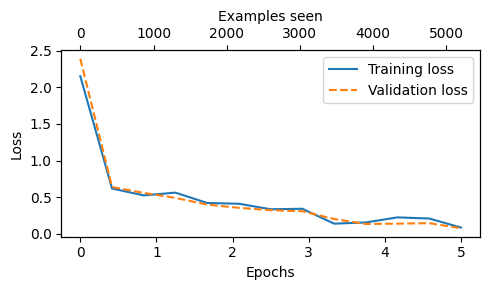

In [220]:
# 导入绘图库
import matplotlib.pyplot as plt
import torch

# 定义绘图函数
def plot_values(
    epochs_seen, examples_seen, train_values, val_values,
    label="loss"
):
    # 创建绘图窗口和子图
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # 绘制训练和验证曲线
    ax1.plot(epochs_seen, train_values, label=f"Training {label}")
    ax1.plot(
        epochs_seen, val_values, linestyle="--",
        label=f"Validation {label}"
    )

    # 设置坐标轴标签和图例
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel(label.capitalize())
    ax1.legend()

    # 创建第二个x轴
    ax2 = ax1.twiny()
    ax2.plot(examples_seen, train_values, alpha=0)
    ax2.set_xlabel("Examples seen")

    # 调整布局并保存显示图表
    fig.tight_layout()
    plt.savefig(f"{label}-plot.pdf")
    plt.show()

# 生成数据并调用绘图函数
# 假设 num_epochs 和 examples_seen 已定义，train_losses 和 val_losses 包含损失值数据
epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
examples_seen_tensor = torch.linspace(0, examples_seen, len(train_losses))
plot_values(epochs_tensor, examples_seen_tensor, train_losses, val_losses)

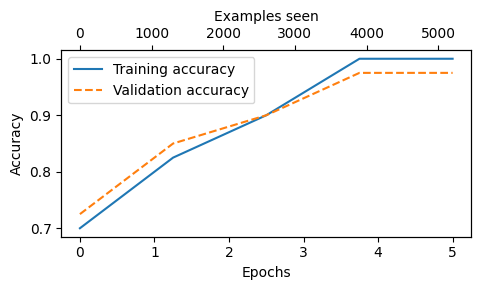

In [221]:
# 生成准确率的 epochs 和 examples seen 张量
epochs_tensor = torch.linspace(0, num_epochs, len(train_accs))
examples_seen_tensor = torch.linspace(0, examples_seen, len(train_accs))

# 绘制准确率曲线
plot_values(
    epochs_tensor, examples_seen_tensor, train_accs, val_accs,
    label="accuracy"
)

In [222]:
# 计算训练集准确率
train_accuracy = calc_accuracy_loader(train_loader, model, device)

# 计算验证集准确率
val_accuracy = calc_accuracy_loader(val_loader, model, device)

# 计算测试集准确率
test_accuracy = calc_accuracy_loader(test_loader, model, device)

# 打印准确率
print(f"Training accuracy: {train_accuracy*100:.2f}%")
print(f"Validation accuracy: {val_accuracy*100:.2f}%")
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Training accuracy: 97.21%
Validation accuracy: 97.32%
Test accuracy: 95.67%


## 6.8 Using the LLM as a spam classifier

In [223]:
def classify_review(
    text, model, tokenizer, device, max_length=None,
    pad_token_id=50256
):
    # 设置模型为评估模式
    model.eval()

    # 编码输入文本
    input_ids = tokenizer.encode(text)

    # 获取模型支持的上下文长度
    supported_context_length = model.pos_emb.weight.shape[1]

    # 截断输入序列（如果过长）
    if max_length is not None:
        input_ids = input_ids[:min(max_length, supported_context_length)]
    else:
        input_ids = input_ids[:supported_context_length]

    # 填充输入序列
    if max_length is not None:
        input_ids += [pad_token_id] * (max_length - len(input_ids))

    # 转换为张量并添加批次维度
    input_tensor = torch.tensor(input_ids, device=device).unsqueeze(0)

    # 在不计算梯度的上下文中进行推理
    with torch.no_grad():
        # 获取模型输出
        logits = model(input_tensor)[:, -1, :]
        # 预测类别标签
        predicted_label = torch.argmax(logits, dim=-1).item()

    # 返回分类结果
    return "spam" if predicted_label == 1 else "not spam"

In [224]:
# 定义输入文本
text_1 = (
    "You are a winner you have been specially"
    " selected to receive $1000 cash or a $2000 award."
)

# 对输入文本进行分类并打印结果
print(classify_review(
    text_1, model, tokenizer, device, max_length=train_dataset.max_length
))

spam


In [225]:
# 定义输入文本
text_2 = (
    "Hey, just wanted to check if we're still on"
    " for dinner tonight? Let me know!"
)

# 对输入文本进行分类并打印结果
print(classify_review(
    text_2, model, tokenizer, device, max_length=train_dataset.max_length
))

not spam


In [226]:
# 保存模型的状态字典
torch.save(model.state_dict(), "review_classifier.pth")

In [227]:
# 加载模型的状态字典
model_state_dict = torch.load("review_classifier.pth", map_location=device)

# 将状态字典加载到模型中
model.load_state_dict(model_state_dict)

<All keys matched successfully>

# 7 Fine-tuning to follow instructions

## 7.1  Introduction to instruction fine-tuning

## 7.2 Preparing a dataset for supervised instruction fine-tuning

In [228]:
import json
import os
import urllib

def download_and_load_file(file_path, url):
    # 检查文件是否已存在
    if not os.path.exists(file_path):
        # 下载文件
        with urllib.request.urlopen(url) as response:
            text_data = response.read().decode("utf-8")
        # 保存文件
        with open(file_path, "w", encoding="utf-8") as file:
            file.write(text_data)
    else:
        # 读取本地文件
        with open(file_path, "r", encoding="utf-8") as file:
            text_data = file.read()

    # 加载 JSON 数据
    with open(file_path, "r") as file:
        data = json.load(file)

    return data

# 定义文件路径和 URL
file_path = "instruction-data.json"
url = (
    "https://raw.githubusercontent.com/rasbt/LLMs-from-scratch"
    "/main/ch07/01_main-chapter-code/instruction-data.json"
)

# 下载并加载文件
data = download_and_load_file(file_path, url)

# 打印数据条目数
print("Number of entries:", len(data))

Number of entries: 1100


In [229]:
# 打印示例条目
print("Example entry:\n", data[50])

Example entry:
 {'instruction': 'Identify the correct spelling of the following word.', 'input': 'Ocassion', 'output': "The correct spelling is 'Occasion.'"}


In [230]:
print("Another example entry:\n", data[999])

Another example entry:
 {'instruction': "What is an antonym of 'complicated'?", 'input': '', 'output': "An antonym of 'complicated' is 'simple'."}


In [231]:
def format_input(entry):
    # 构建指令文本
    instruction_text = (
        f'"Write is an instruction that describes a task. "\n'
        f'"Below is a response that appropriately completes the request."\n'
        f'\n### Instruction:\n{entry["instruction"]}'
    )

    # 构建输入文本
    input_text = (
        f'\n### Input:\n{entry["input"]}' if entry["input"] else ""
    )

    # 返回格式化的输入文本
    return instruction_text + input_text

In [232]:
# 格式化输入文本
model_input = format_input(data[50])

# 生成期望响应
desired_response = f'\n### Response:\n{data[50]["output"]}'

# 打印组合文本
print(model_input + desired_response)

"Write is an instruction that describes a task. "
"Below is a response that appropriately completes the request."

### Instruction:
Identify the correct spelling of the following word.
### Input:
Ocassion
### Response:
The correct spelling is 'Occasion.'


In [233]:
# 格式化输入文本
model_input = format_input(data[999])

# 生成期望响应
desired_response = f'\n### Response:\n{data[999]["output"]}'

# 打印组合文本
print(model_input + desired_response)

"Write is an instruction that describes a task. "
"Below is a response that appropriately completes the request."

### Instruction:
What is an antonym of 'complicated'?
### Response:
An antonym of 'complicated' is 'simple'.


In [234]:
# 计算各数据集的大小
train_portion = int(len(data) * 0.85)  # 训练集占比 85%
test_portion = int(len(data) * 0.1)    # 测试集占比 10%
val_portion = len(data) - train_portion - test_portion  # 验证集占比 5%

# 划分数据集
train_data = data[:train_portion]
test_data = data[train_portion:train_portion + test_portion]
val_data = data[train_portion + test_portion:]

# 打印各数据集的长度
print("Training set length:", len(train_data))
print("Validation set length:", len(val_data))
print("Test set length:", len(test_data))

Training set length: 935
Validation set length: 55
Test set length: 110


## 7.3 Organizing data into training batches

In [235]:
import torch
from torch.utils.data import Dataset

class InstructionDataset(Dataset):
    def __init__(self, data, tokenizer):
        # 初始化数据集
        self.data = data
        self.encoded_texts = []

        # 预处理数据
        for entry in data:
            # 格式化输入文本
            instruction_plus_input = format_input(entry)
            # 生成响应文本
            response_text = f'\n### Response:\n{entry["output"]}'
            # 组合输入和响应文本
            full_text = instruction_plus_input + response_text
            # 编码文本
            self.encoded_texts.append(tokenizer.encode(full_text))

    def __getitem__(self, index):
        # 获取指定索引的编码文本
        return self.encoded_texts[index]

    def __len__(self):
        # 返回数据集的长度
        return len(self.data)

In [236]:
import tiktoken

# 获取 GPT-2 的分词器
tokenizer = tiktoken.get_encoding("gpt2")

# 编码文本并打印结果
print(tokenizer.encode("<|endoftext|>", allowed_special={"<|endoftext|>"}))

[50256]


In [237]:
def custom_collate_draft_1(
    batch,
    pad_token_id=50256,
    device="cpu"
):
    # 计算批次中最长序列的长度
    batch_max_length = max(len(item) + 1 for item in batch)

    # 初始化输入列表
    inputs_list = []

    # 处理每个序列
    for item in batch:
        # 复制并扩展序列
        new_item = item.copy()
        new_item += [pad_token_id]

        # 填充序列到最大长度
        padded = new_item + [pad_token_id] * (batch_max_length - len(new_item))

        # 转换为张量并移除最后一个填充 token
        inputs = torch.tensor(padded[:-1])
        inputs_list.append(inputs)

    # 堆叠张量并移动到目标设备
    inputs_tensor = torch.stack(inputs_list).to(device)

    return inputs_tensor

In [238]:
# 定义输入序列
inputs_1 = [0, 1, 2, 3, 4]
inputs_2 = [5, 6]
inputs_3 = [7, 8, 9]

# 构建批次数据
batch = (
    inputs_1,
    inputs_2,
    inputs_3,
)

# 处理批次数据并打印结果
print(custom_collate_draft_1(batch))

tensor([[    0,     1,     2,     3,     4],
        [    5,     6, 50256, 50256, 50256],
        [    7,     8,     9, 50256, 50256]])


In [239]:
def custom_collate_draft_2(
    batch,
    pad_token_id=50256,
    device="cpu"
):
    # 计算批次中最长序列的长度
    batch_max_length = max(len(item) + 1 for item in batch)

    # 初始化输入和目标列表
    inputs_list, targets_list = [], []

    # 处理每个序列
    for item in batch:
        # 复制并扩展序列
        new_item = item.copy()
        new_item += [pad_token_id]

        # 填充序列到最大长度
        padded = new_item + [pad_token_id] * (batch_max_length - len(new_item))

        # 生成输入和目标张量
        inputs = torch.tensor(padded[:-1])
        targets = torch.tensor(padded[1:])

        # 添加到列表
        inputs_list.append(inputs)
        targets_list.append(targets)

    # 堆叠张量并移动到目标设备
    inputs_tensor = torch.stack(inputs_list).to(device)
    targets_tensor = torch.stack(targets_list).to(device)

    return inputs_tensor, targets_tensor

# 定义输入序列
inputs_1 = [0, 1, 2, 3, 4]
inputs_2 = [5, 6]
inputs_3 = [7, 8, 9]

# 构建批次数据
batch = (
    inputs_1,
    inputs_2,
    inputs_3,
)

# 处理批次数据并打印结果
inputs, targets = custom_collate_draft_2(batch)
print(inputs)
print(targets)

tensor([[    0,     1,     2,     3,     4],
        [    5,     6, 50256, 50256, 50256],
        [    7,     8,     9, 50256, 50256]])
tensor([[    1,     2,     3,     4, 50256],
        [    6, 50256, 50256, 50256, 50256],
        [    8,     9, 50256, 50256, 50256]])


In [240]:
def custom_collate_fn(
    batch,
    pad_token_id=50256,
    ignore_index=-100,
    allowed_max_length=None,
    device="cpu"
):
    # 计算批次中最长序列的长度
    batch_max_length = max(len(item) + 1 for item in batch)

    # 初始化输入和目标列表
    inputs_list, targets_list = [], []

    # 处理每个序列
    for item in batch:
        # 复制并扩展序列
        new_item = item.copy()
        new_item += [pad_token_id]

        # 填充序列到最大长度
        padded = new_item + [pad_token_id] * (batch_max_length - len(new_item))

        # 生成输入和目标张量
        inputs = torch.tensor(padded[:-1])
        targets = torch.tensor(padded[1:])

        # 处理掩码
        mask = targets == pad_token_id
        indices = torch.nonzero(mask).squeeze()
        if indices.numel() > 1:
            targets[indices[1:]] = ignore_index

        # 截断到最大长度（如果指定）
        if allowed_max_length is not None:
            inputs = inputs[:allowed_max_length]
            targets = targets[:allowed_max_length]

        # 添加到列表
        inputs_list.append(inputs)
        targets_list.append(targets)

    # 堆叠张量并移动到目标设备
    inputs_tensor = torch.stack(inputs_list).to(device)
    targets_tensor = torch.stack(targets_list).to(device)

    return inputs_tensor, targets_tensor

In [241]:
# 处理批次数据并打印结果
inputs, targets = custom_collate_fn(batch)
print(inputs)
print(targets)

tensor([[    0,     1,     2,     3,     4],
        [    5,     6, 50256, 50256, 50256],
        [    7,     8,     9, 50256, 50256]])
tensor([[    1,     2,     3,     4, 50256],
        [    6, 50256,  -100,  -100,  -100],
        [    8,     9, 50256,  -100,  -100]])


In [242]:
import torch
import torch.nn.functional as F

# 定义预测结果和目标
logits_1 = torch.tensor([
    [-1.0, 1.0],  # 第一个 token 的预测结果
    [-0.5, 1.5]   # 第二个 token 的预测结果
])
targets_1 = torch.tensor([0, 1])  # 正确的 token 索引

# 计算交叉熵损失
loss_1 = F.cross_entropy(logits_1, targets_1)

# 打印损失
print(loss_1)

tensor(1.1269)


In [243]:
import torch
import torch.nn.functional as F

# 定义预测结果和目标
logits_2 = torch.tensor([
    [-1.0, 1.0],  # 第一个 token 的预测结果
    [-0.5, 1.5],  # 第二个 token 的预测结果
    [-0.5, 1.5]   # 第三个 token 的预测结果
])
targets_2 = torch.tensor([0, 1, 1])  # 正确的 token 索引

# 计算交叉熵损失
loss_2 = F.cross_entropy(logits_2, targets_2)

# 打印损失
print(loss_2)

tensor(0.7936)


In [244]:
import torch
import torch.nn.functional as F

# 定义预测结果和目标
logits_2 = torch.tensor([
    [-1.0, 1.0],  # 第一个 token 的预测结果
    [-0.5, 1.5],  # 第二个 token 的预测结果
    [-0.5, 1.5]   # 第三个 token 的预测结果
])
targets_3 = torch.tensor([0, 1, -100])  # 正确的 token 索引，其中 -100 表示忽略

# 计算交叉熵损失
loss_3 = F.cross_entropy(logits_2, targets_3)

# 打印损失
print(loss_3)

# 比较损失值是否相等
print("loss_1 == loss_3:", loss_1 == loss_3)

tensor(1.1269)
loss_1 == loss_3: tensor(True)


## 7.4 Creating data loaders for an instruction dataset

In [245]:
import torch

# 选择计算设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 对于 Apple Silicon 芯片，取消以下两行的注释以使用 GPU
# if torch.backends.mps.is_available():
#     device = torch.device("mps")

# 打印设备信息
print("Device:", device)

Device: cpu


In [246]:
from functools import partial

# 定制 collate 函数
customized_collate_fn = partial(
    custom_collate_fn,
    device=device,
    allowed_max_length=1024
)

In [247]:
from torch.utils.data import DataLoader

# 设置随机种子
torch.manual_seed(123)

# 定义数据加载器参数
num_workers = 0
batch_size = 8

# 创建训练集数据加载器
train_dataset = InstructionDataset(train_data, tokenizer)
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    collate_fn=customized_collate_fn,
    shuffle=True,
    drop_last=True,
    num_workers=num_workers
)

# 创建验证集数据加载器
val_dataset = InstructionDataset(val_data, tokenizer)
val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    collate_fn=customized_collate_fn,
    shuffle=False,
    drop_last=False,
    num_workers=num_workers
)

# 创建测试集数据加载器
test_dataset = InstructionDataset(test_data, tokenizer)
test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    collate_fn=customized_collate_fn,
    shuffle=False,
    drop_last=False,
    num_workers=num_workers
)

In [248]:
# 打印训练集数据加载器信息
print("Train loader:")
for inputs, targets in train_loader:
    print(inputs.shape, targets.shape)

Train loader:
torch.Size([8, 64]) torch.Size([8, 64])
torch.Size([8, 80]) torch.Size([8, 80])
torch.Size([8, 76]) torch.Size([8, 76])
torch.Size([8, 71]) torch.Size([8, 71])
torch.Size([8, 68]) torch.Size([8, 68])
torch.Size([8, 76]) torch.Size([8, 76])
torch.Size([8, 83]) torch.Size([8, 83])
torch.Size([8, 70]) torch.Size([8, 70])
torch.Size([8, 65]) torch.Size([8, 65])
torch.Size([8, 78]) torch.Size([8, 78])
torch.Size([8, 66]) torch.Size([8, 66])
torch.Size([8, 71]) torch.Size([8, 71])
torch.Size([8, 70]) torch.Size([8, 70])
torch.Size([8, 81]) torch.Size([8, 81])
torch.Size([8, 73]) torch.Size([8, 73])
torch.Size([8, 83]) torch.Size([8, 83])
torch.Size([8, 75]) torch.Size([8, 75])
torch.Size([8, 69]) torch.Size([8, 69])
torch.Size([8, 87]) torch.Size([8, 87])
torch.Size([8, 71]) torch.Size([8, 71])
torch.Size([8, 84]) torch.Size([8, 84])
torch.Size([8, 75]) torch.Size([8, 75])
torch.Size([8, 72]) torch.Size([8, 72])
torch.Size([8, 68]) torch.Size([8, 68])
torch.Size([8, 72]) torch.

## 7.5 Loading a pretrained LLM

In [249]:
from gpt_download import download_and_load_gpt2
# from chapter05 import load_weights_into_gpt

# 基础配置
BASE_CONFIG = {
    "vocab_size": 50257,    # 词汇表大小
    "context_length": 1024, # 上下文长度
    "drop_rate": 0.0,       # 丢弃率
    "qkv_bias": True        # 查询-键-值偏置
}

# 模型配置
model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

# 选择模型
CHOOSE_MODEL = "gpt2-medium (355M)"
BASE_CONFIG.update(model_configs[CHOOSE_MODEL])

# 获取模型大小
model_size = CHOOSE_MODEL.split(" ")[-1].lstrip("(").rstrip(")")

# 下载并加载模型权重
settings, params = download_and_load_gpt2(
    model_size=model_size,
    models_dir="gpt2"
)

# 初始化模型并加载权重
model = GPTModel(BASE_CONFIG)
load_weights_into_gpt(model, params)
model.eval()

File already exists and is up-to-date: gpt2/355M/checkpoint
File already exists and is up-to-date: gpt2/355M/encoder.json
File already exists and is up-to-date: gpt2/355M/hparams.json
File already exists and is up-to-date: gpt2/355M/model.ckpt.data-00000-of-00001
File already exists and is up-to-date: gpt2/355M/model.ckpt.index
File already exists and is up-to-date: gpt2/355M/model.ckpt.meta
File already exists and is up-to-date: gpt2/355M/vocab.bpe


GPTModel(
  (tok_emb): Embedding(50257, 1024)
  (pos_emb): Embedding(1024, 1024)
  (drop_emb): Dropout(p=0.0, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=1024, out_features=1024, bias=True)
        (W_key): Linear(in_features=1024, out_features=1024, bias=True)
        (W_value): Linear(in_features=1024, out_features=1024, bias=True)
        (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=1024, out_features=4096, bias=True)
          (1): GELU()
          (2): Linear(in_features=4096, out_features=1024, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.0, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(i

In [250]:
import torch

# 设置随机种子
torch.manual_seed(123)

# 格式化验证集中的一个条目
input_text = format_input(val_data[0])

# 打印格式化后的输入文本
print(input_text)

"Write is an instruction that describes a task. "
"Below is a response that appropriately completes the request."

### Instruction:
Convert the active sentence to passive: 'The chef cooks the meal every day.'


In [251]:
# from chapter05 import generate, text_to_token_ids, token_ids_to_text

# 生成文本
token_ids = generate(
    model=model,
    idx=text_to_token_ids(input_text, tokenizer),
    max_new_tokens=35,
    context_size=BASE_CONFIG["context_length"],
    eos_id=50256,
)

# 将 token ID 转换为文本
generated_text = token_ids_to_text(token_ids, tokenizer)

In [252]:
# 提取响应文本
response_text = generated_text[len(input_text):].strip()

# 打印响应文本
print(response_text)

### Response:

Write is an instruction that describes a task. "

"Below is a response that appropriately completes the request."

### Instruction:


## 7.6 Fine-tuning the LLM on instruction data

In [253]:
# from chapter05 import (
#     calc_loss_loader,
#     train_model_simple
# )

In [254]:
def calc_loss_loader(data_loader, model, device, num_batches=None):
    # 初始化总损失
    total_loss = 0

    # 处理空数据加载器
    if len(data_loader) == 0:
        return float("nan")

    # 确定要处理的批次数量
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches = min(num_batches, len(data_loader))

    # 遍历数据加载器
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            # 计算一个批次的损失
            loss = calc_loss_batch(
                input_batch, target_batch, model, device
            )
            # 累加损失
            total_loss += loss.item()
        else:
            break

    # 返回平均损失
    return total_loss / num_batches

In [255]:
def train_model_simple(
    model, train_loader, val_loader,
    optimizer, device, num_epochs,
    eval_freq, eval_iter, start_context, tokenizer
):
    # 初始化损失列表和token统计
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen, global_step = 0, -1

    # 主训练循环
    for epoch in range(num_epochs):
        # 设置模型为训练模式
        model.train()
        # 遍历训练集
        for input_batch, target_batch in train_loader:
            # 更新全局步数
            global_step += 1
            # 重置梯度
            optimizer.zero_grad()
            # 计算损失
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            # 反向传播
            loss.backward()
            # 更新模型参数
            optimizer.step()
            # 更新已处理的token数
            tokens_seen += input_batch.numel()

            # 定期评估模型
            if global_step % eval_freq == 0:
                # 评估模型
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter
                )
                # 记录损失
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                # 打印损失
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, "
                      f"Val loss {val_loss:.3f}")

        # 生成并打印示例文本
        generate_and_print_sample(
            model, tokenizer, device, start_context
        )

    # 返回训练历史
    return train_losses, val_losses, track_tokens_seen

In [256]:
# # 将模型移动到目标设备
# model.to(device)

# # 设置随机种子
# torch.manual_seed(123)

# # 计算训练集损失
# with torch.no_grad():
#     train_loss = calc_loss_loader(
#         train_loader, model, device, num_batches=5
#     )

# # 计算验证集损失
#     val_loss = calc_loss_loader(
#         val_loader, model, device, num_batches=5
#     )

# # 打印损失值
# print("Training loss:", train_loss)
# print("Validation loss:", val_loss)

In [ ]:
import time
import torch
# 记录开始时间
start_time = time.time()

# 设置随机种子
torch.manual_seed(123)

# 初始化优化器
optimizer = torch.optim.AdamW(
    model.parameters(), lr=0.00005, weight_decay=0.1
)

# 定义训练轮数
num_epochs = 2

# 训练模型
train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=5, eval_iter=5,
    start_context=format_input(val_data[0]), tokenizer=tokenizer
)

# 记录结束时间
end_time = time.time()

# 计算执行时间（分钟）
execution_time_minutes = (end_time - start_time) / 60

# 打印训练完成信息
print(f"Training completed in {execution_time_minutes:.2f} minutes.")

In [ ]:
# from chapter05 import plot_losses

# 创建 epoch 张量
epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))

# 绘制损失图表
plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)

## 7.7 Extracting and saving responses

In [ ]:
import torch

# 设置随机种子
torch.manual_seed(123)

# 遍历测试集的前三个样本
for entry in test_data[:3]:
    # 格式化输入文本
    input_text = format_input(entry)

    # 生成文本
    token_ids = generate(
        model=model,
        idx=text_to_token_ids(input_text, tokenizer).to(device),
        max_new_tokens=256,
        context_size=BASE_CONFIG["context_length"],
        eos_id=50256
    )

    # 将 token ID 转换为文本
    generated_text = token_ids_to_text(token_ids, tokenizer)

    # 提取响应文本
    response_text = (
        generated_text[len(input_text):]
        .replace("### Response:", "")
        .strip()
    )

    # 打印输入文本、正确响应和模型响应
    print(input_text)
    print(f"\nCorrect response:\n> {entry['output']}")
    print(f"Model response:\n> {response_text.strip()}")
    print("-" * 50)

In [ ]:
import json
from tqdm import tqdm

# 遍历测试集的所有样本
for i, entry in tqdm(enumerate(test_data), total=len(test_data)):
    # 格式化输入文本
    input_text = format_input(entry)

    # 生成文本
    token_ids = generate(
        model=model,
        idx=text_to_token_ids(input_text, tokenizer).to(device),
        max_new_tokens=256,
        context_size=BASE_CONFIG["context_length"],
        eos_id=50256
    )

    # 将 token ID 转换为文本
    generated_text = token_ids_to_text(token_ids, tokenizer)

    # 提取响应文本
    response_text = (
        generated_text[len(input_text):]
        .replace("### Response:", "")
        .strip()
    )

    # 保存响应文本到测试数据中
    test_data[i]["model_response"] = response_text

# 将测试数据保存到 JSON 文件
with open("instruction-data-with-response.json", "w") as file:
    json.dump(test_data, file, indent=4)

In [ ]:
print(test_data[0])

In [ ]:
import re

# 生成文件名
file_name = f"{re.sub(r'[()]', '', CHOOSE_MODEL)}-sft.pth"

# 保存模型状态字典
torch.save(model.state_dict(), file_name)

# 打印保存信息
print(f"Model saved as {file_name}")

## 7.8 Evaluating the fine-tuned LLM

In [ ]:
ollama serve

In [ ]:
ollama run llama3

In [ ]:
import psutil

# 定义函数检查进程是否运行
def check_if_running(process_name):
    running = False
    for proc in psutil.process_iter(["name"]):
        if process_name in proc.info["name"]:
            running = True
            break
    return running

# 检查 Ollama 是否运行
ollama_running = check_if_running("ollama")

# 如果 Ollama 未运行，抛出异常
if not ollama_running:
    raise RuntimeError(
        "Ollama not running. Launch ollama before proceeding."
    )

# 打印 Ollama 运行状态
print("Ollama running:", check_if_running("ollama"))

In [ ]:
import json
import urllib.request

# 定义函数查询模型
def query_model(prompt, model="llama3", url="http://localhost:11434/api/chat"):
    # 创建请求数据
    data = {
        "model": model,
        "messages": [
            {"role": "user", "content": prompt}
        ],
        "options": {
            "seed": 123,
            "temperature": 0,
            "num_ctx": 2048
        }
    }

    # 将数据转换为 JSON 格式并编码
    payload = json.dumps(data).encode("utf-8")

    # 创建请求对象
    request = urllib.request.Request(
        url,
        data=payload,
        method="POST"
    )

    # 添加请求头
    request.add_header("Content-Type", "application/json")

    # 发送请求并获取响应
    response_data = ""
    with urllib.request.urlopen(request) as response:
        while True:
            line = response.readline().decode("utf-8")
            if not line:
                break
            response_json = json.loads(line)
            response_data += response_json["message"]["content"]

    # 返回响应数据
    return response_data

In [ ]:
# 定义模型名称
model = "llama3"

# 查询模型
result = query_model("What do Llamas eat?", model)

# 打印响应
print(result)

In [ ]:
# 遍历测试数据的前三个样本
for entry in test_data[:3]:
    # 生成评分提示
    prompt = (
        f"Given the input `{format_input(entry)}` "
        f"and correct output `{entry['output']}`, "
        f"score the model response `{entry['model_response']}` "
        f"on a scale from 0 to 100, where 100 is the best score. "
    )

    # 打印数据集响应、模型响应和评分提示
    print("\nDataset response:")
    print(">", entry['output'])
    print("\nModel response:")
    print(">", entry["model_response"])
    print("\nScore:")
    print(">", query_model(prompt))
    print("\n" + "-" * 50)

In [ ]:
from tqdm import tqdm

# 定义函数生成模型评分
def generate_model_scores(json_data, json_key, model="llama3"):
    scores = []
    for entry in tqdm(json_data, desc="Scoring entries"):
        # 生成评分提示
        prompt = (
            f"Given the input `{format_input(entry)}` "
            f"and correct output `{entry['output']}`, "
            f"score the model response `{entry[json_key]}` "
            f"on a scale from 0 to 100, where 100 is the best score. "
            f"Respond with the integer number only."
        )

        # 查询模型获取评分
        score = query_model(prompt, model)

        # 尝试将评分转换为整数并添加到列表
        try:
            scores.append(int(score))
        except ValueError:
            print(f"Could not convert score: {score}")
            continue
    return scores

In [ ]:
# 生成模型评分
scores = generate_model_scores(test_data, "model_response")

# 打印评分的数量
print(f"Number of scores: {len(scores)} of {len(test_data)}")

# 打印平均分
print(f"Average score: {sum(scores)/len(scores):.2f}\n")